<a href="https://colab.research.google.com/github/Muhammad-Abdullah-Jami/Data-mining/blob/main/Data_mining_ANN_and_decision_tree_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### installing important libraries

In [ ]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### importing libraries


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [ ]:

# Step 1: Import Breast Cancer dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ["Sample code", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
                 "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin",
                 "Normal Nucleoli", "Mitoses", "Class"]

# Read the dataset
data = pd.read_csv(url, names=column_names, header=None)

data

Sample code  Clump Thickness  Uniformity of Cell Size  \
0        1000025                5                        1   
1        1002945                5                        4   
2        1015425                3                        1   
3        1016277                6                        8   
4        1017023                4                        1   
..           ...              ...                      ...   
694       776715                3                        1   
695       841769                2                        1   
696       888820                5                       10   
697       897471                4                        8   
698       897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1                           4                  5                            7   
2                           1                  1                            2   
3                           8                  1                            3   
4                           1                  3                            2   
..                        ...                ...                          ...   
694                         1                  1                            3   
695                         1                  1                            2   
696                        10                  3                            7   
697                         6                  4                            3   
698                         8                  5                            4   

    Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0             1                3                1        1      2  
1            10                3                2        1      2  
2             2                3                1        1      2  
3             4                3                7        1      2  
4             1                3                1        1      2  
..          ...              ...              ...      ...    ...  
694           2                1                1        1      2  
695           1                1                1        1      2  
696           3                8               10        2      4  
697           4               10                6        1      4  
698           5               10                4        1      4  

[699 rows x 11 columns]

# Topic 1 Using Artificial Neural Network

### Data Preprocessing

In [ ]:
# Step 2: Data Preprocessing
#handling missing values, encode categorical variables, etc.
# droping rows with missing values for this example
data = data.dropna()

# 'Class' column is the target variable
X = data.drop("Class", axis=1)
y = data["Class"]

y_binary = y.map({2: 0, 4: 1})  # converting the 2 4 values to 0 and 1

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Convert 'Bare Nuclei' to numeric, replacing non-numeric values with NaN
X_train['Bare Nuclei'] = pd.to_numeric(X_train['Bare Nuclei'], errors='coerce')
X_test['Bare Nuclei'] = pd.to_numeric(X_test['Bare Nuclei'], errors='coerce')

# Handle missing values (replace NaN with the mean for simplicity)
X_train['Bare Nuclei'].fillna(X_train['Bare Nuclei'].mean(), inplace=True)
X_test['Bare Nuclei'].fillna(X_test['Bare Nuclei'].mean(), inplace=True)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Use long() for classification labels
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)  # Use long() for classification labels




In [ ]:
# Create PyTorch Dataset and DataLoader
class BreastCancerDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Create datasets and dataloaders
train_dataset = BreastCancerDataset(X_train_tensor, y_train_tensor)
test_dataset = BreastCancerDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
# Define a simple neural network model with softmax activation
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()                  # using ReLU activation functon
        self.fc2 = nn.Linear(64, 2)  # 2 classes for binary classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


Epoch 1/10, Train Loss: 62743.0291
Epoch 1/10, Test Loss: 42880.7357, Accuracy: 67.86%
Epoch 2/10, Train Loss: 19357.2769
Epoch 2/10, Test Loss: 8640.9648, Accuracy: 32.14%
Epoch 3/10, Train Loss: 12732.2184
Epoch 3/10, Test Loss: 2788.6571, Accuracy: 67.86%
Epoch 4/10, Train Loss: 4913.6401
Epoch 4/10, Test Loss: 2830.1127, Accuracy: 67.86%
Epoch 5/10, Train Loss: 1726.6685
Epoch 5/10, Test Loss: 1853.5293, Accuracy: 67.86%
Epoch 6/10, Train Loss: 1238.6372
Epoch 6/10, Test Loss: 1982.4899, Accuracy: 67.86%
Epoch 7/10, Train Loss: 1216.1463
Epoch 7/10, Test Loss: 1177.4936, Accuracy: 67.86%
Epoch 8/10, Train Loss: 662.3120
Epoch 8/10, Test Loss: 679.6700, Accuracy: 32.14%
Epoch 9/10, Train Loss: 695.1643
Epoch 9/10, Test Loss: 2331.4693, Accuracy: 67.86%
Epoch 10/10, Train Loss: 1405.7657
Epoch 10/10, Test Loss: 226.3095, Accuracy: 67.86%


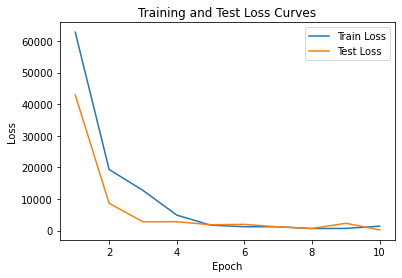

In [ ]:
best_accuracy = 0.0  # Variable to track the best accuracy

# Instantiate the model
input_size = X_train.shape[1]  # Number of features
model = SimpleNN(input_size)


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store training and test loss values
train_losses = []
test_losses = []

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)

    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_loss:.4f}")

    # Evaluation on the test set
    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        avg_test_loss = test_loss / len(test_loader)
        test_losses.append(avg_test_loss)

        accuracy = correct / total
        print(f"Epoch {epoch + 1}/{num_epochs}, Test Loss: {avg_test_loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

        # Update best accuracy if a new best is found
        if accuracy > best_accuracy:
            best_accuracy = accuracy
# Plotting the loss curves
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Curves')
plt.legend()
plt.show()

### Fine Tuning Neural Network

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Adjust the learning rate


#### Modifying the Architechure adding mroe layers and dropoing some

In [ ]:
class FineTunedNN(nn.Module):
    def __init__(self, input_size):
        super(FineTunedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)  # Add dropout for regularization
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Instantiate the fine-tuned model
model = FineTunedNN(input_size)


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)  # Adjust the batch size
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


Epoch 1/20, Train Loss: 38069.2555
Epoch 2/20, Train Loss: 32489.1469
Epoch 3/20, Train Loss: 33671.9660
Epoch 4/20, Train Loss: 28164.3184
Epoch 5/20, Train Loss: 25348.4984
Epoch 6/20, Train Loss: 25455.5031
Epoch 7/20, Train Loss: 24753.3543
Epoch 8/20, Train Loss: 28946.8711
Epoch 9/20, Train Loss: 22317.5297
Epoch 10/20, Train Loss: 23771.6238
Epoch 11/20, Train Loss: 21883.3352
Epoch 12/20, Train Loss: 18585.2564
Epoch 13/20, Train Loss: 20771.2625
Epoch 14/20, Train Loss: 21635.9242
Epoch 15/20, Train Loss: 21180.4396
Epoch 16/20, Train Loss: 23568.2656
Epoch 17/20, Train Loss: 21543.4332
Epoch 18/20, Train Loss: 20042.0547
Epoch 19/20, Train Loss: 21017.3260
Epoch 20/20, Train Loss: 21790.8648
Accuracy on the test set: 67.86%


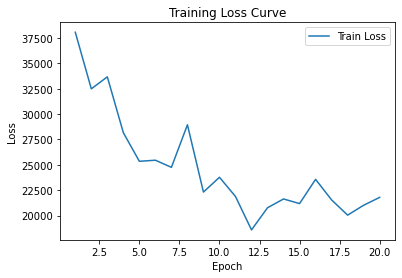

In [ ]:
# Instantiate the fine-tuned model
input_size = X_train.shape[1]  # Number of features
model = FineTunedNN(input_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.001)  # Adjusted learning rate and added weight decay

num_epochs = 20  # Increase the number of epochs
train_losses = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.long())  # Use long() to cast labels to long type
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {avg_loss:.4f}")

# Evaluation on the test set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0

    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels.long()).sum().item()

    accuracy = correct / total
    print(f"Accuracy on the test set: {accuracy * 100:.2f}%")

# Plotting the loss curve
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()




# Topic 2 Decision Tree Classifiers and Random Forests

In [ ]:
# Step 1: Import Breast Cancer dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ["Sample code", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
                 "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin",
                 "Normal Nucleoli", "Mitoses", "Class"]

# Read the dataset
data = pd.read_csv(url, names=column_names, header=None)
data

Sample code  Clump Thickness  Uniformity of Cell Size  \
0        1000025                5                        1   
1        1002945                5                        4   
2        1015425                3                        1   
3        1016277                6                        8   
4        1017023                4                        1   
..           ...              ...                      ...   
694       776715                3                        1   
695       841769                2                        1   
696       888820                5                       10   
697       897471                4                        8   
698       897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1                           4                  5                            7   
2                           1                  1                            2   
3                           8                  1                            3   
4                           1                  3                            2   
..                        ...                ...                          ...   
694                         1                  1                            3   
695                         1                  1                            2   
696                        10                  3                            7   
697                         6                  4                            3   
698                         8                  5                            4   

    Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0             1                3                1        1      2  
1            10                3                2        1      2  
2             2                3                1        1      2  
3             4                3                7        1      2  
4             1                3                1        1      2  
..          ...              ...              ...      ...    ...  
694           2                1                1        1      2  
695           1                1                1        1      2  
696           3                8               10        2      4  
697           4               10                6        1      4  
698           5               10                4        1      4  

[699 rows x 11 columns]

In [ ]:

# Step 2: Data Preprocessing


data.replace('?', pd.NA, inplace=True)

# Drop rows with missing values for this example
data = data.dropna()

# Assuming 'Class' column is the target variable
X = data.drop("Class", axis=1)
y = data["Class"]

# Convert target variable to binary (0 and 1)
y_binary = y.map({2: 0, 4: 1})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)


## Decision Tree Classifier

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        79
           1       0.96      0.93      0.95        58

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



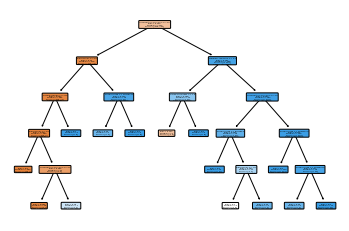

Accuracy of Decision Tree is: 	 95.62043795620438


In [ ]:
# Step 3: Implement Decision Tree Classifier
# Hyperparameter tuning (you can adjust these values based on experimentation)
max_depth = 5
min_samples_leaf = 5

# Create Decision Tree model
dt_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)

# Train the model
dt_classifier.fit(X_train, y_train)

# Step 4: Evaluate the Decision Tree model
# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

# Step 5: Visualize the Decision Tree (uncomment the line below if you want to visualize the tree)
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, rounded=True)
plt.show()
print("Accuracy of Decision Tree is: \t",accuracy*100)

## Using Random Forest Classifier

Random Forest Accuracy: 0.96
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        79
           1       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



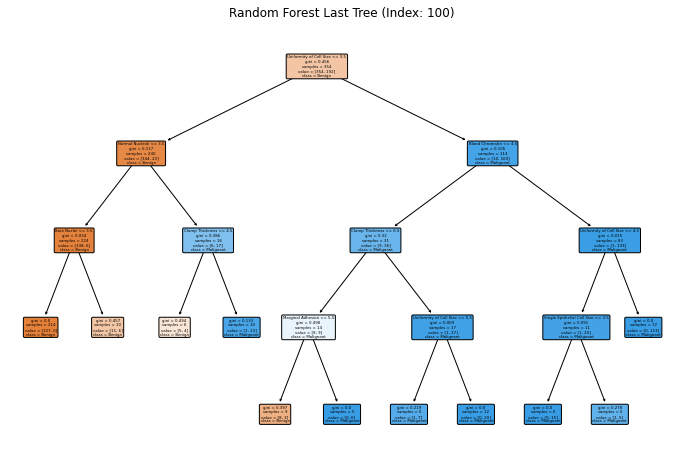

Accuracy of Random Forest is: 	 96.35036496350365


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Import Breast Cancer dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
column_names = ["Sample code", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
                 "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin",
                 "Normal Nucleoli", "Mitoses", "Class"]

# Read the dataset
data = pd.read_csv(url, names=column_names, header=None)

# Step 2: Data Preprocessing
# Replace '?' with NaN
data.replace('?', pd.NA, inplace=True)

# Drop rows with missing values for this example
data = data.dropna()

# Assuming 'Class' column is the target variable
X = data.drop("Class", axis=1)
y = data["Class"]

# Convert target variable to binary (0 and 1)
y_binary = y.map({2: 0, 4: 1})

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Step 3: Implement Random Forest Classifier
# Hyperparameter tuning (you can adjust these values based on experimentation)
n_estimators = 100
max_depth = 10
min_samples_leaf = 5

# Create Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Step 4: Evaluate the Random Forest model
# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print("Random Forest Classification Report:\n", classification_rep_rf)

# Step 5: Visualize each tree in the Random Forest
last_tree_index = n_estimators - 1
last_tree = rf_classifier.estimators_[last_tree_index]

plt.figure(figsize=(12, 8))
plot_tree(last_tree, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, rounded=True)
plt.title(f"Random Forest Last Tree (Index: {last_tree_index + 1})")
plt.show()

print("Accuracy of Random Forest is: \t",accuracy_rf*100)

In [ ]:
print("The End 😄️")

The End 😄️


### checking shape and nature of code for understanding purposes the above code is perfect version

### below is self test and self understanding code

In [ ]:
X

Sample code  Clump Thickness  Uniformity of Cell Size  \
0        1000025                5                        1   
1        1002945                5                        4   
2        1015425                3                        1   
3        1016277                6                        8   
4        1017023                4                        1   
..           ...              ...                      ...   
694       776715                3                        1   
695       841769                2                        1   
696       888820                5                       10   
697       897471                4                        8   
698       897471                4                        8   

     Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                           1                  1                            2   
1                           4                  5                            7   
2                           1                  1                            2   
3                           8                  1                            3   
4                           1                  3                            2   
..                        ...                ...                          ...   
694                         1                  1                            3   
695                         1                  1                            2   
696                        10                  3                            7   
697                         6                  4                            3   
698                         8                  5                            4   

    Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  
0             1                3                1        1  
1            10                3                2        1  
2             2                3                1        1  
3             4                3                7        1  
4             1                3                1        1  
..          ...              ...              ...      ...  
694           2                1                1        1  
695           1                1                1        1  
696           3                8               10        2  
697           4               10                6        1  
698           5               10                4        1  

[699 rows x 10 columns]

In [ ]:
y

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [ ]:
# Convert the list to a set to get unique elements
unique_elements_set = set(y)

# Check the number of unique elements
num_unique_elements = len(unique_elements_set)

# Print or use the unique elements
print(f"Unique elements in the list: {unique_elements_set}")
print(f"Number of unique elements: {num_unique_elements}")


Unique elements in the list: {2, 4}
Number of unique elements: 2


### to visiualise evry tree in the random forest

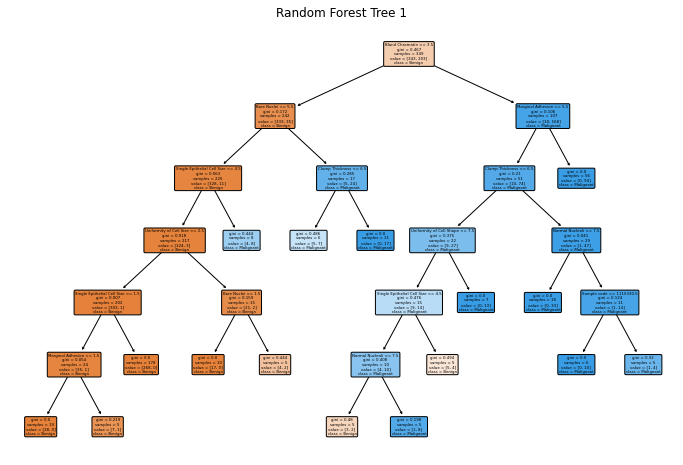

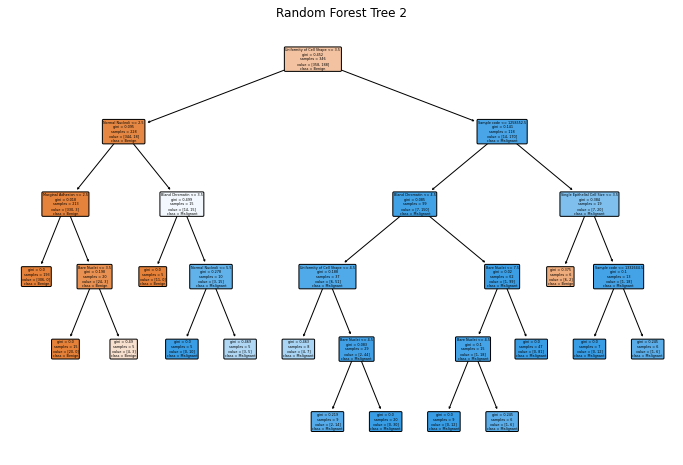

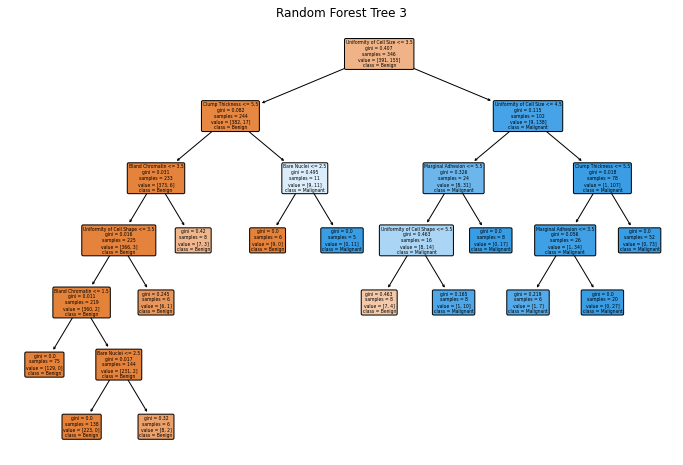

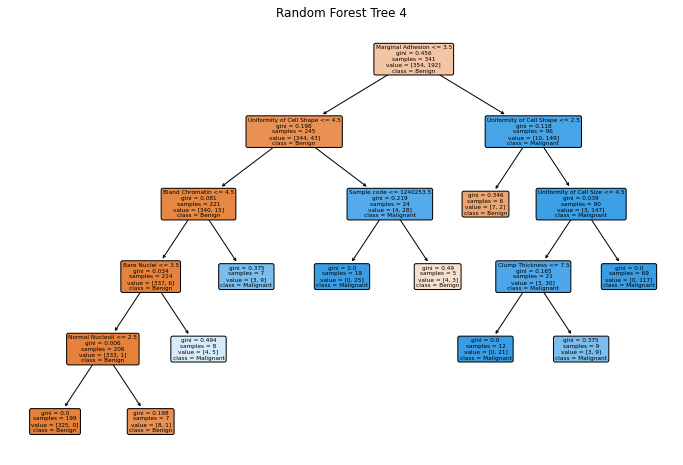

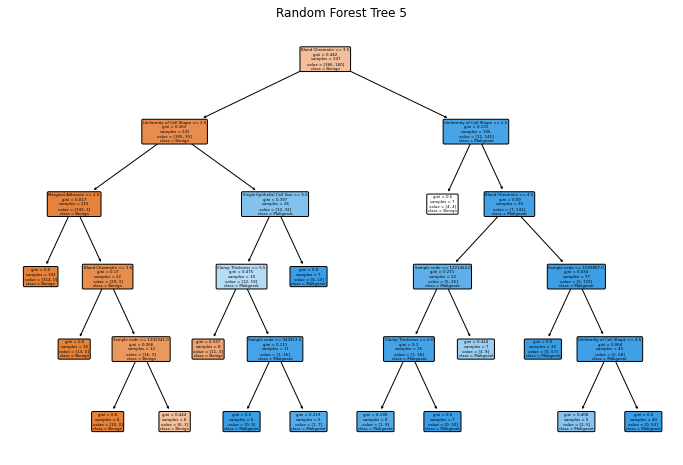

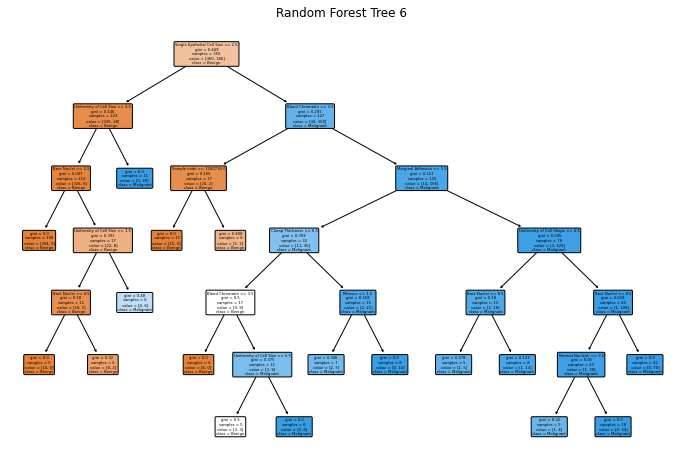

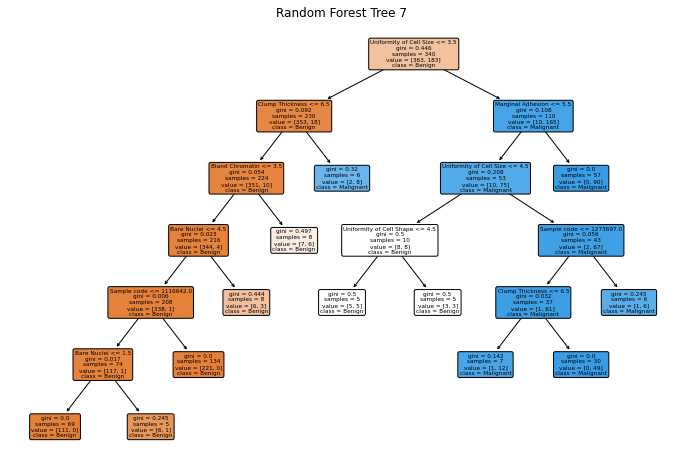

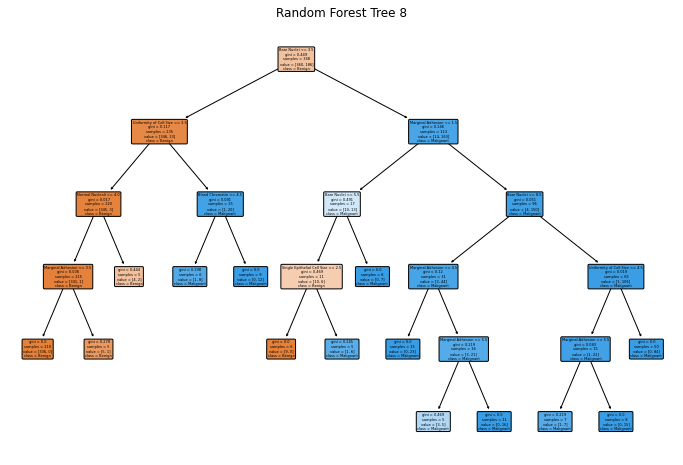

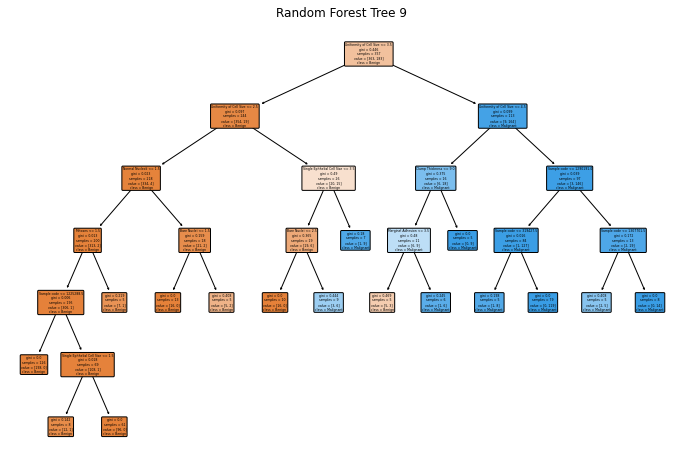

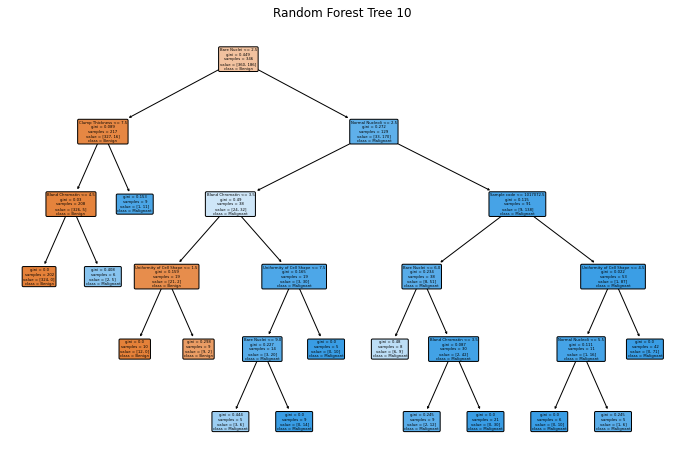

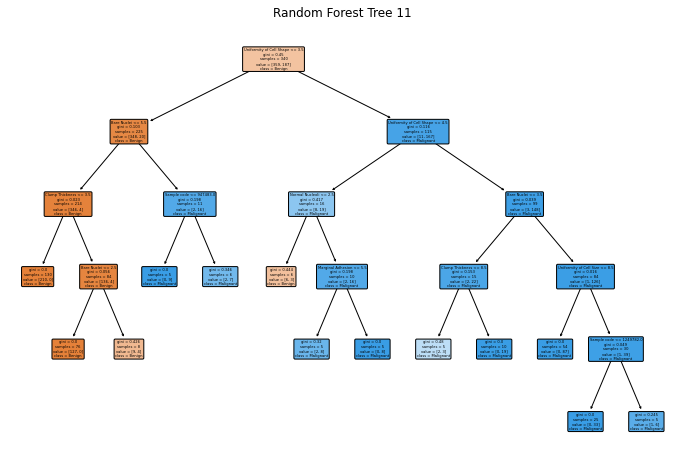

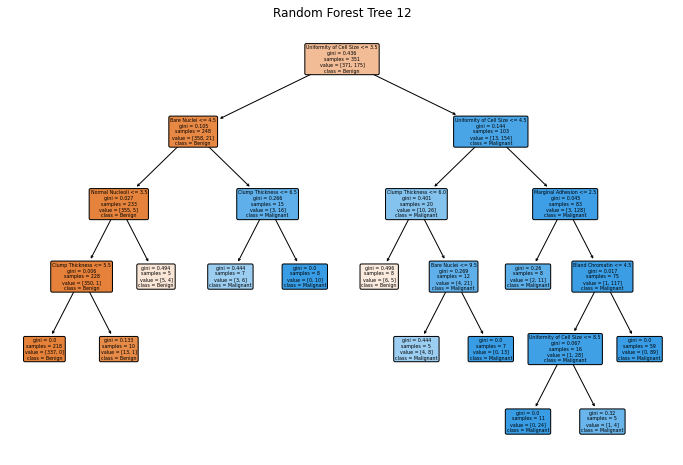

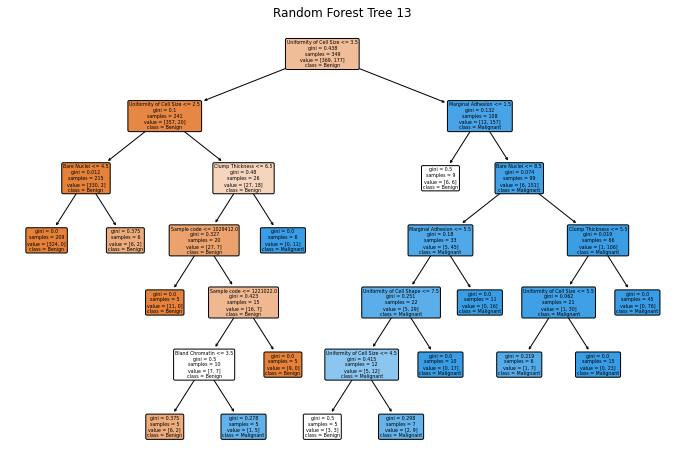

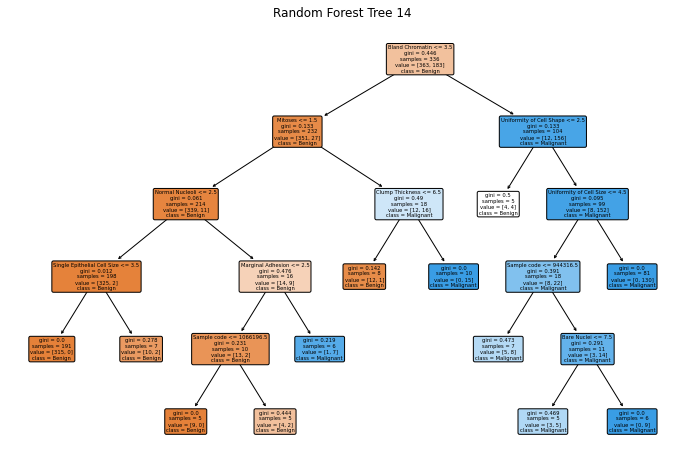

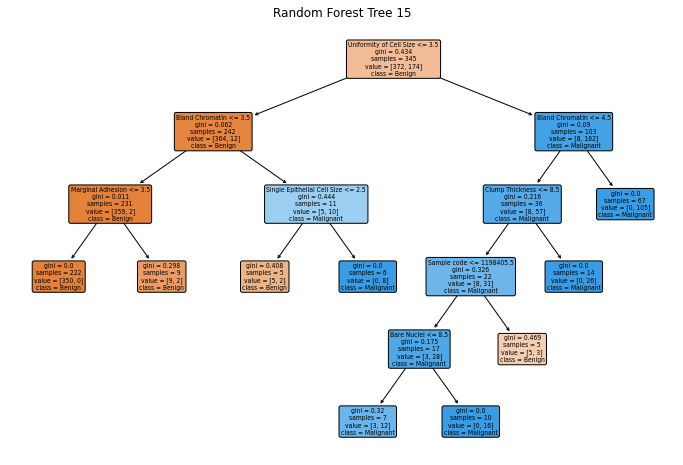

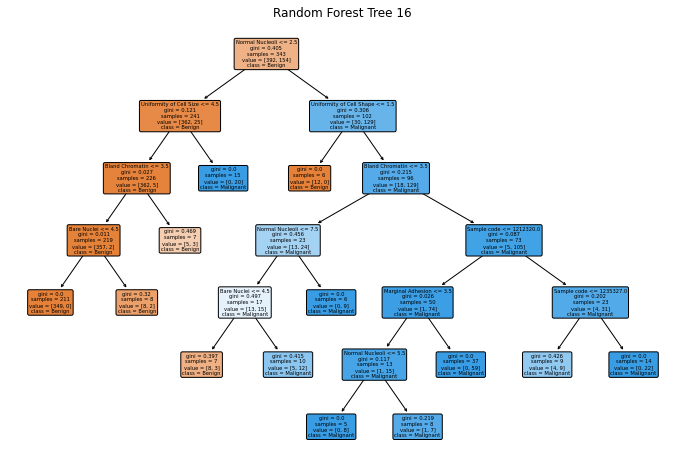

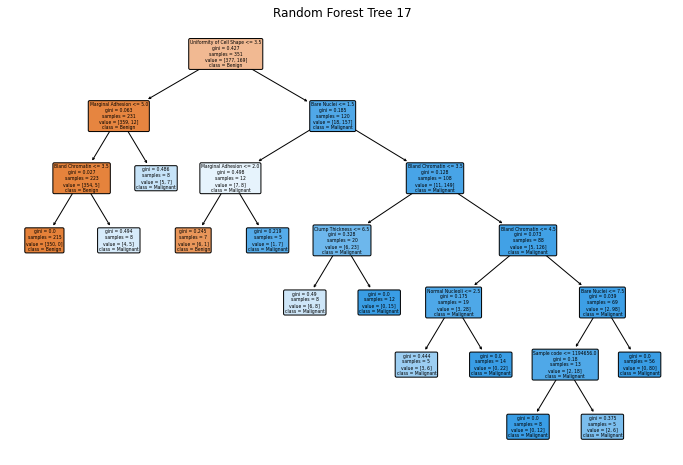

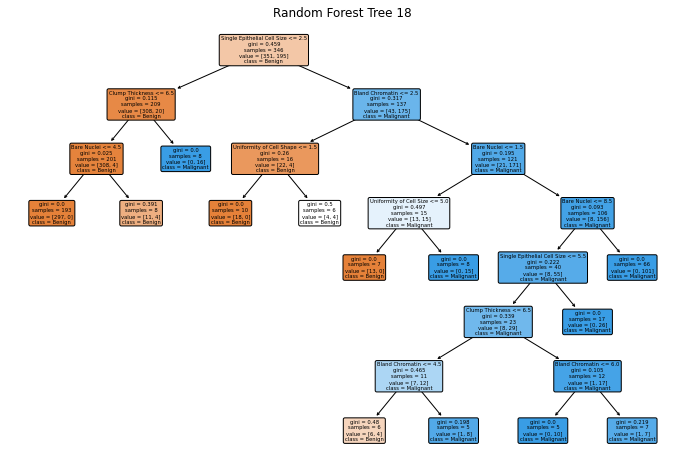

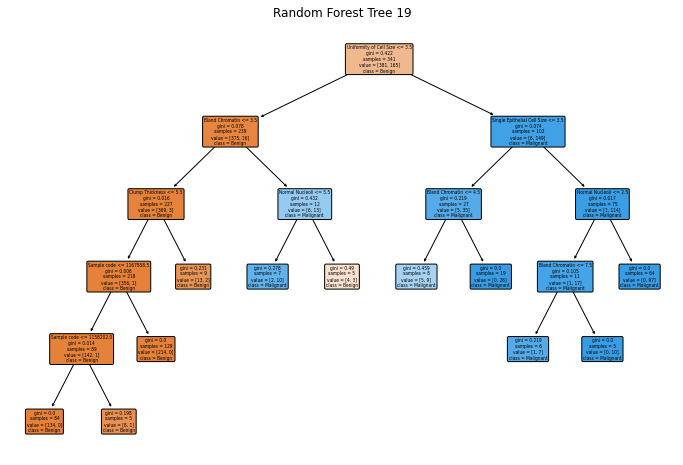

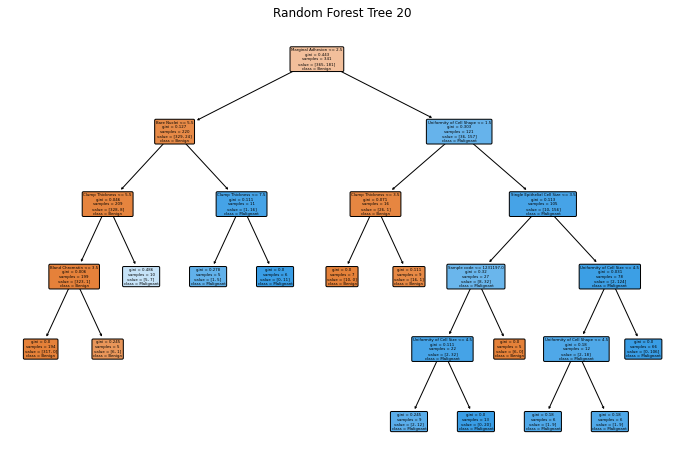

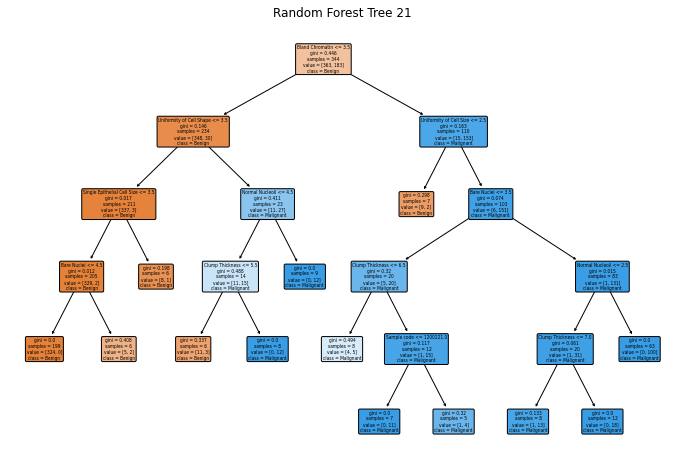

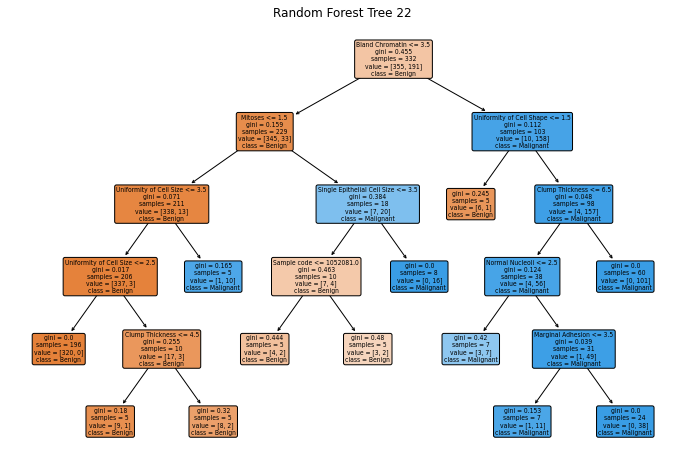

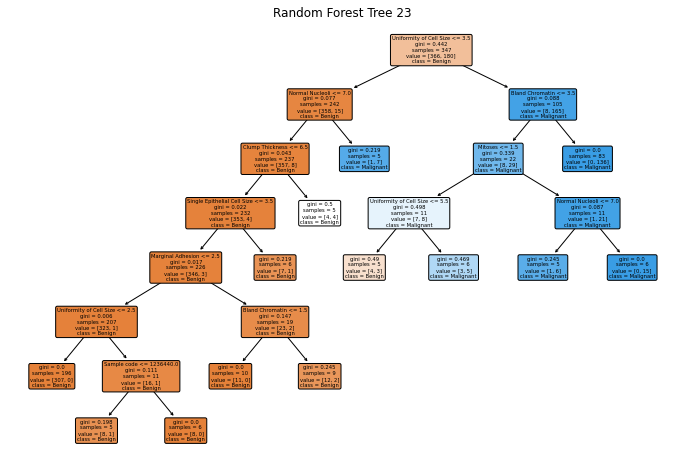

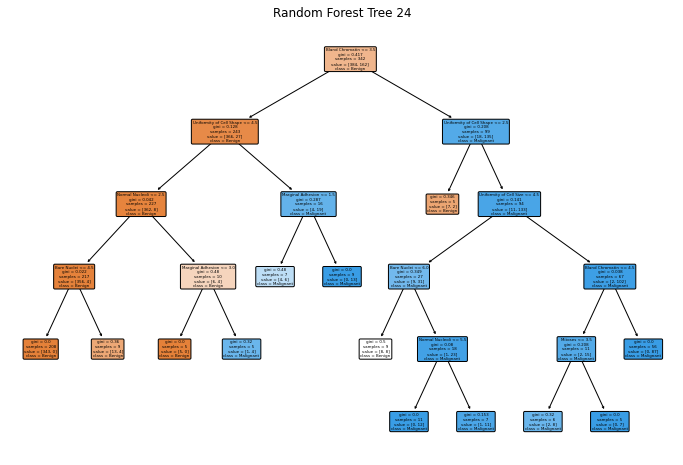

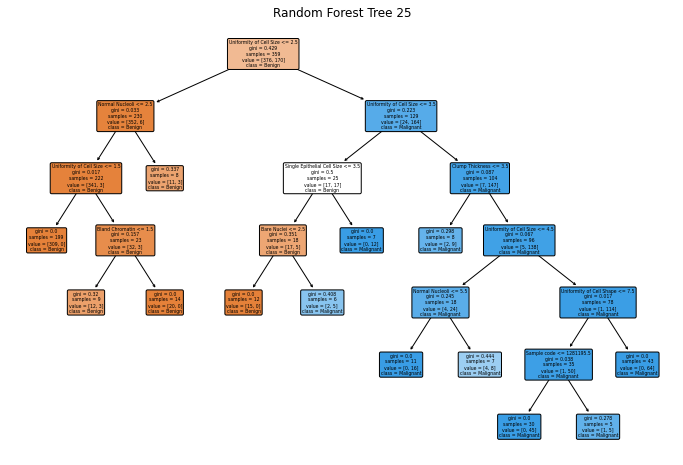

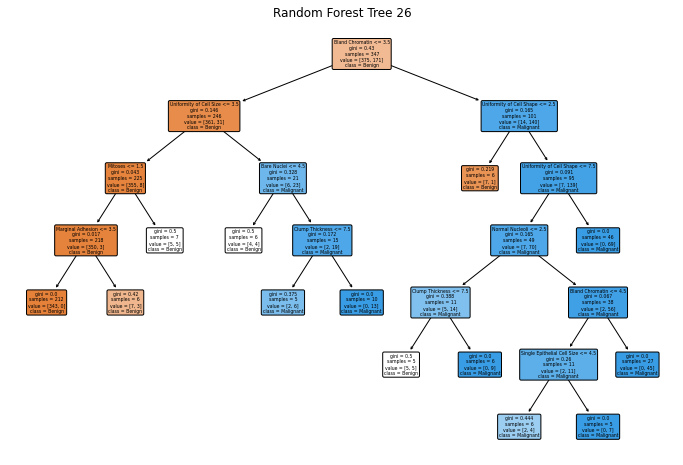

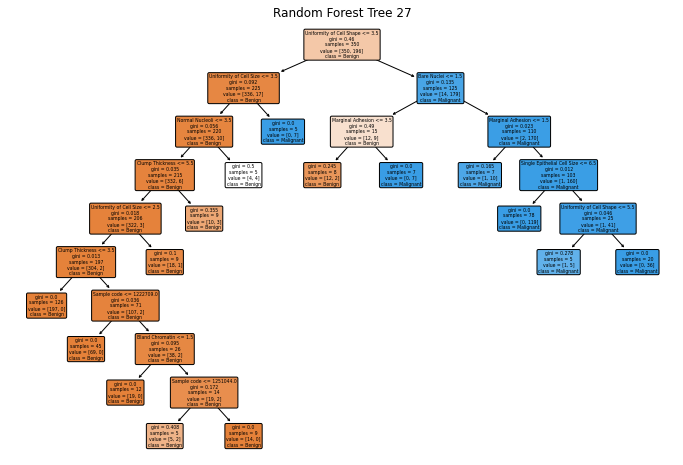

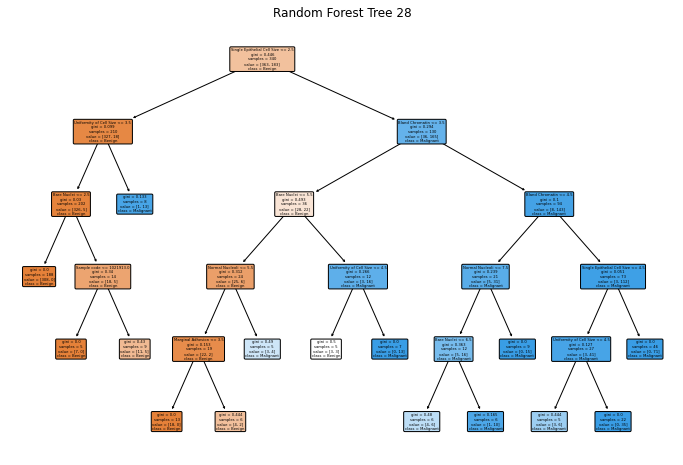

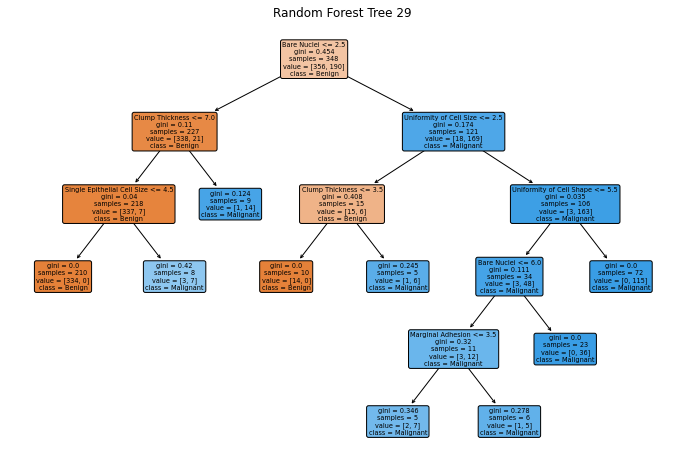

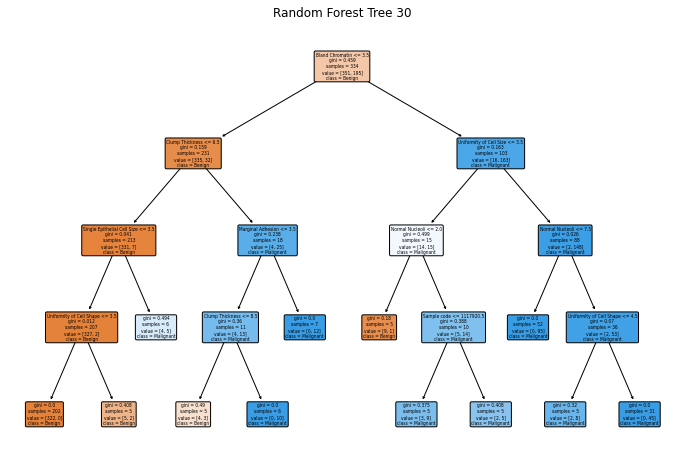

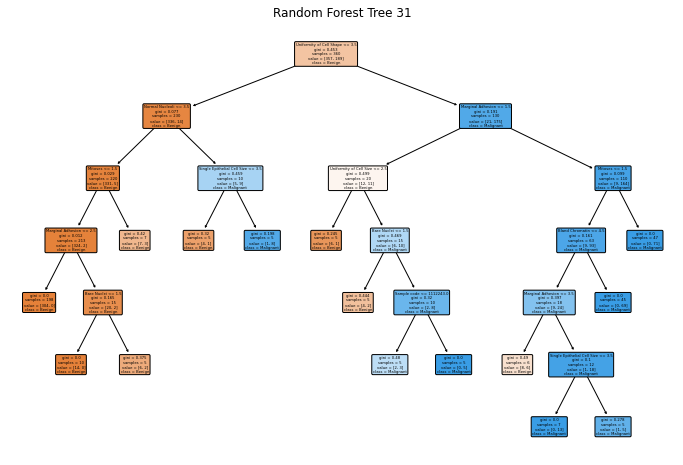

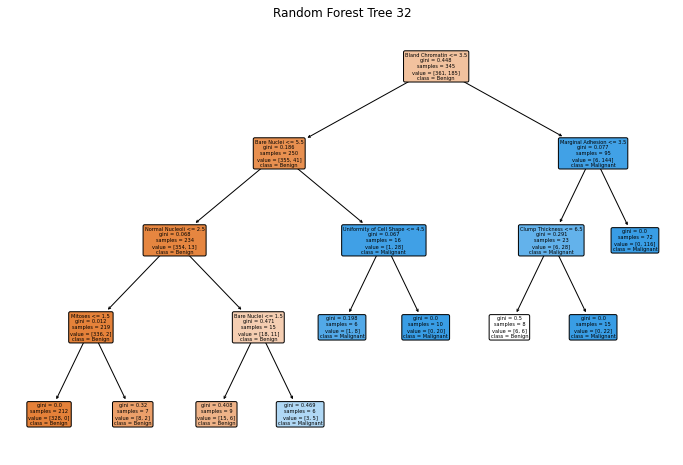

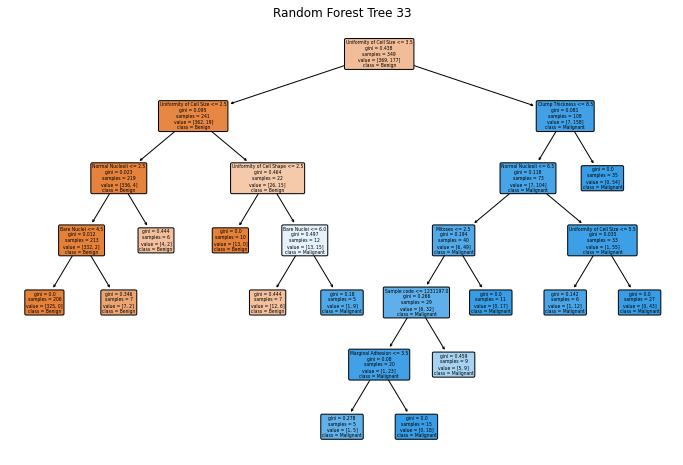

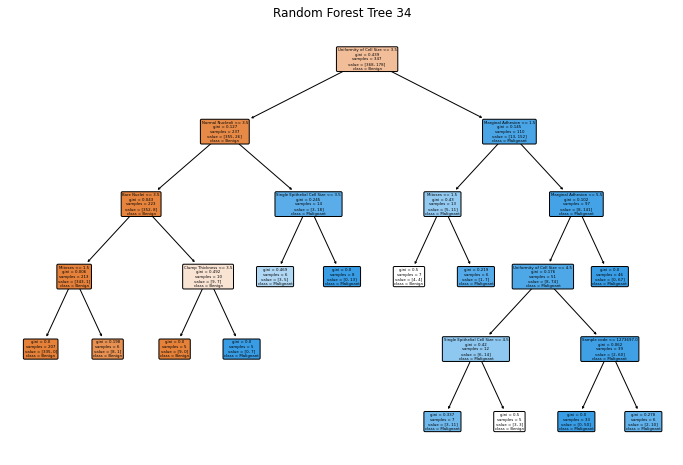

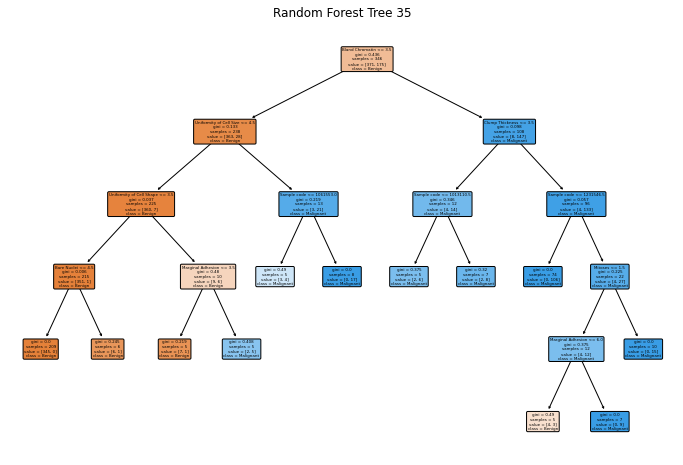

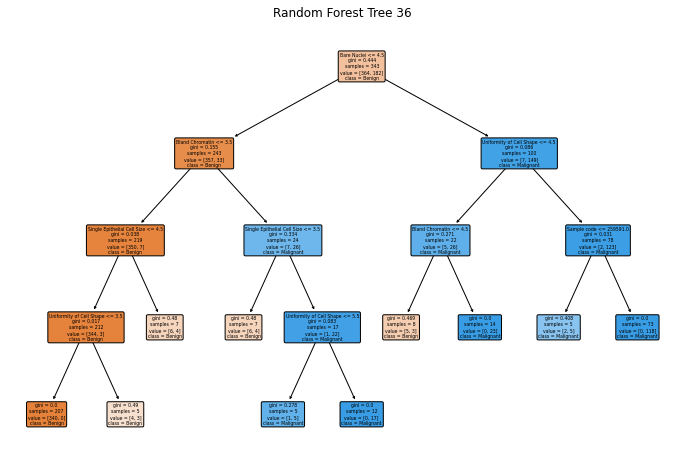

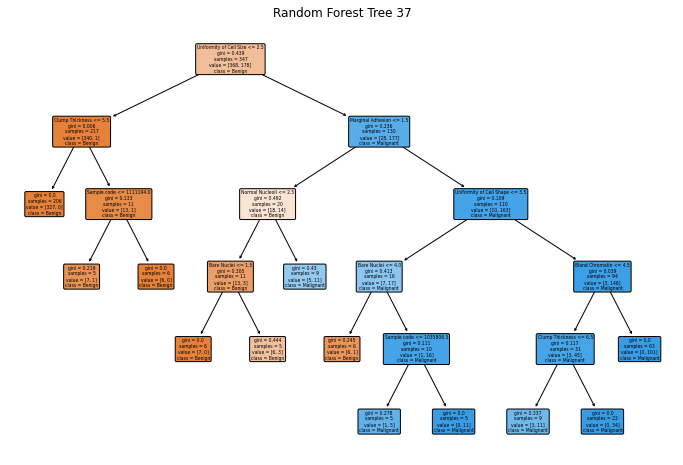

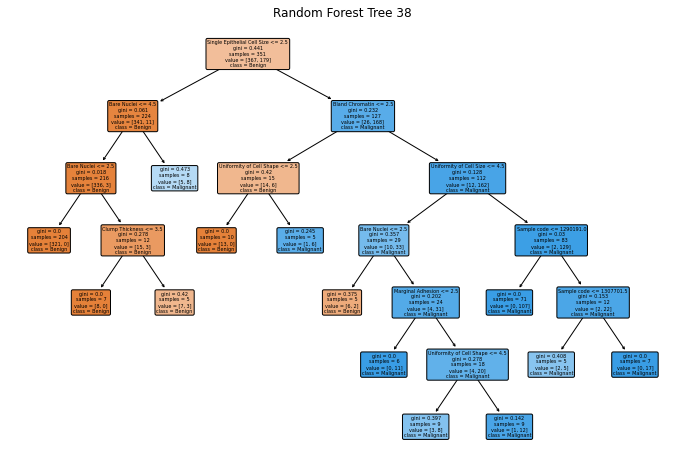

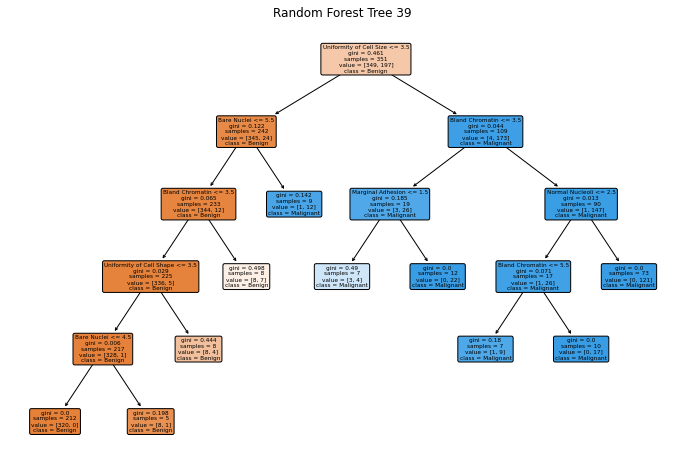

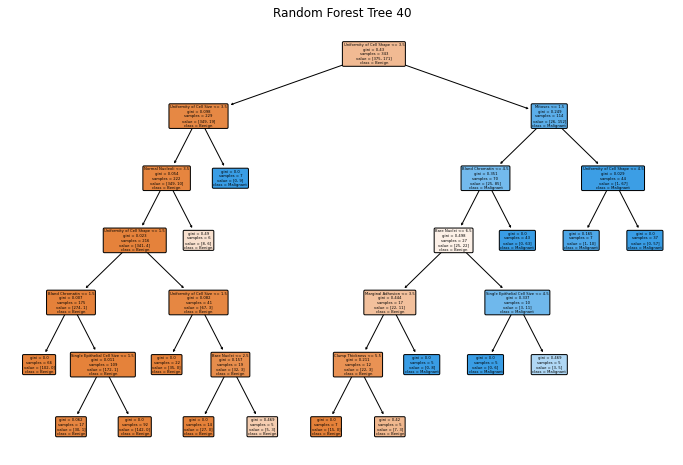

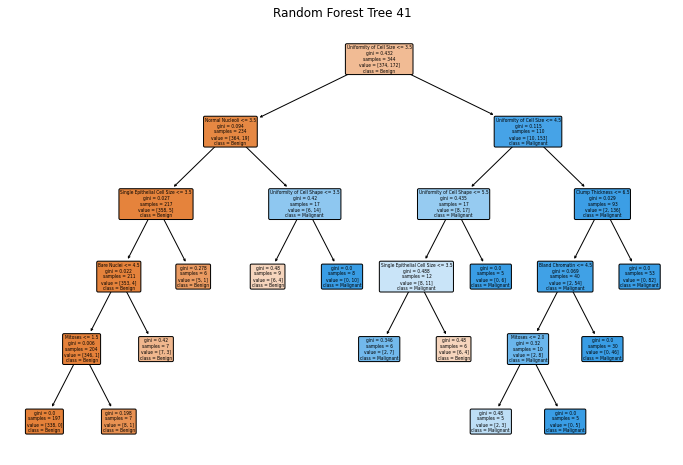

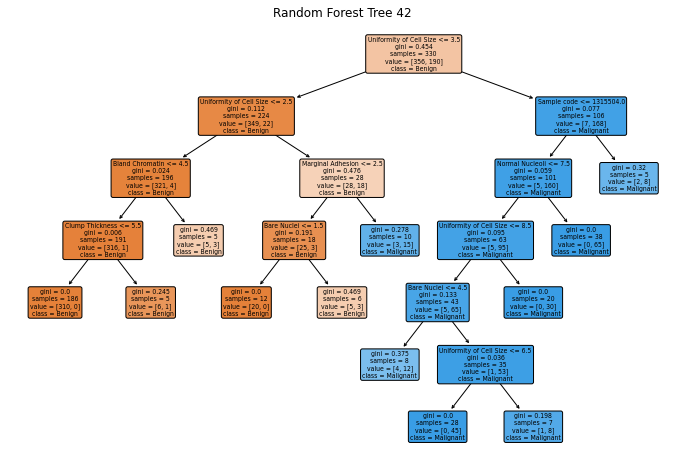

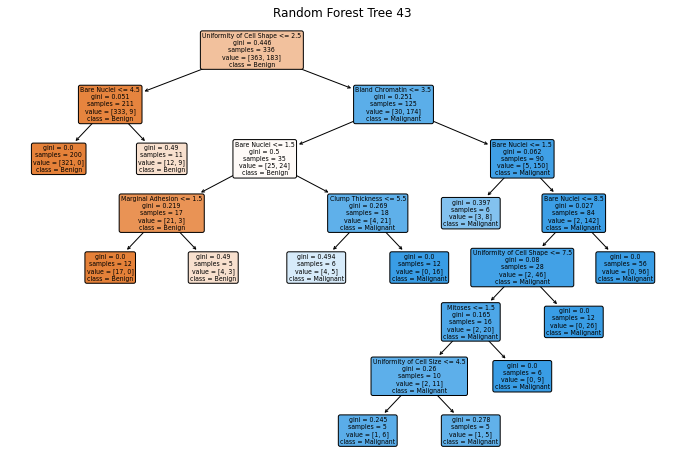

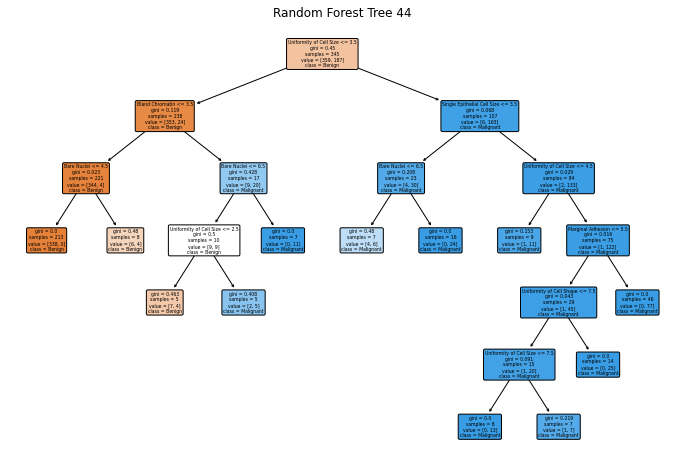

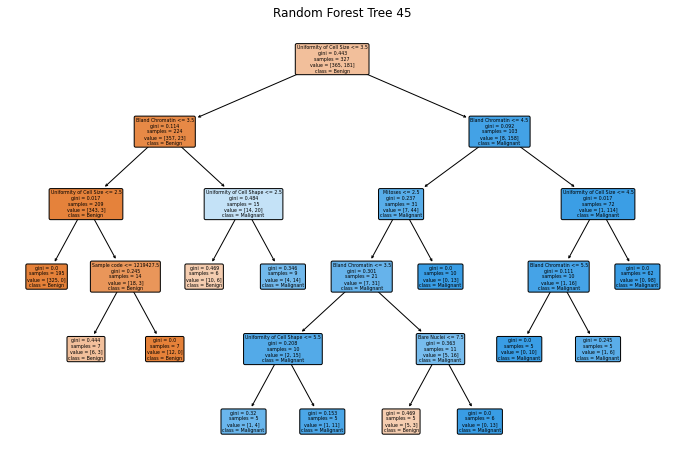

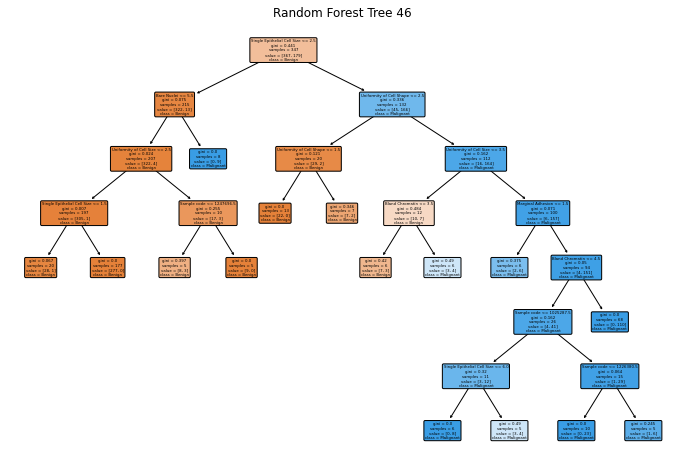

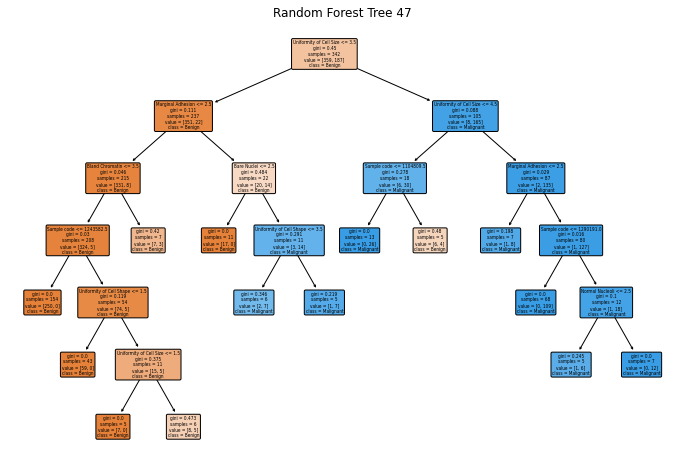

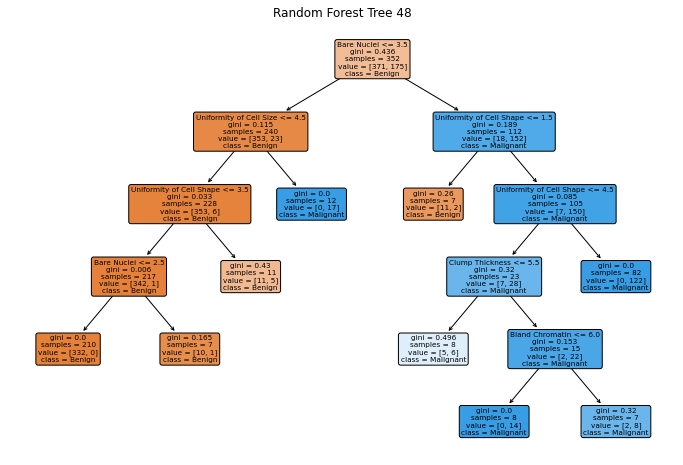

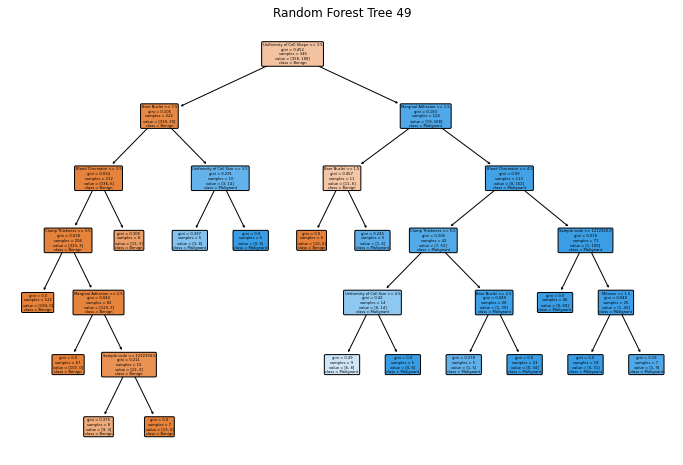

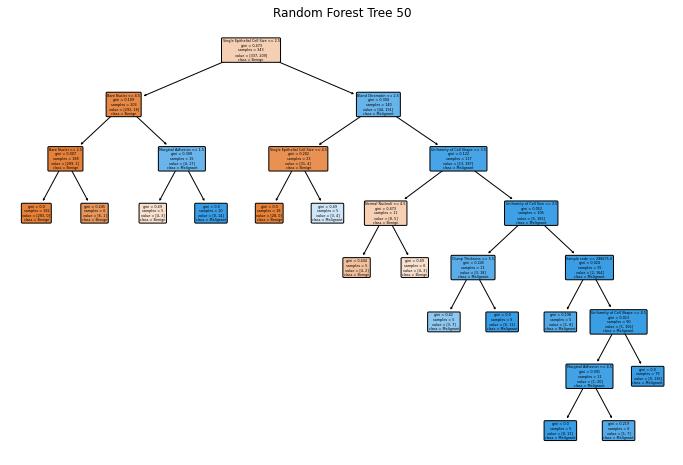

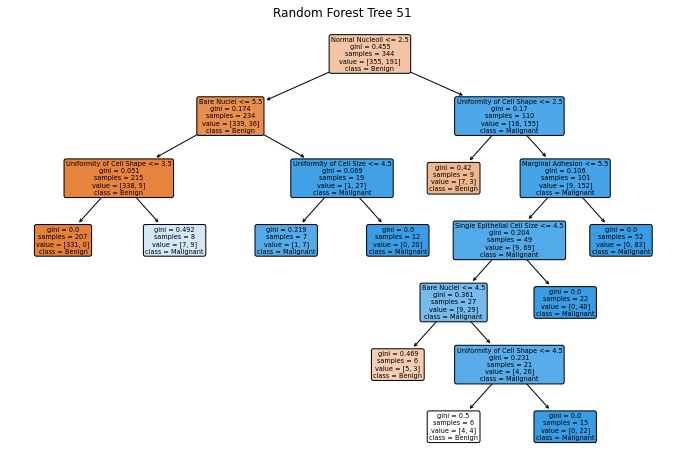

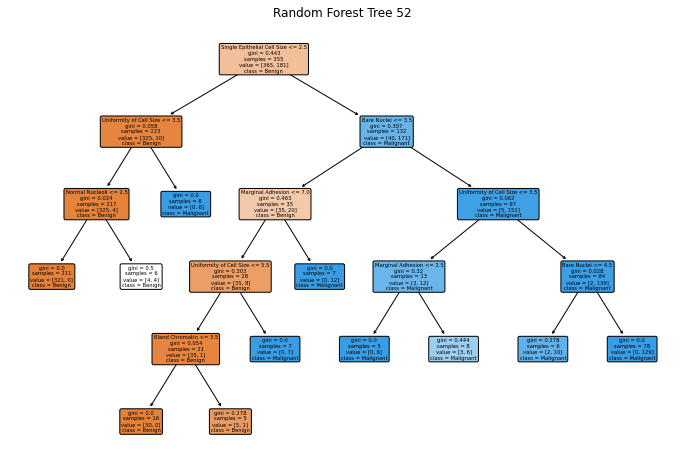

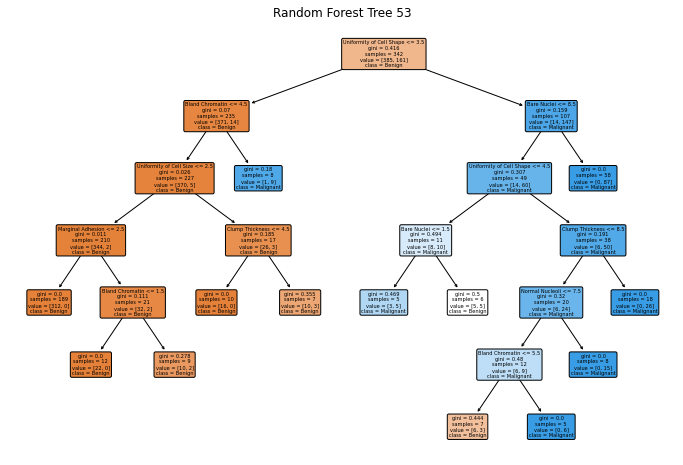

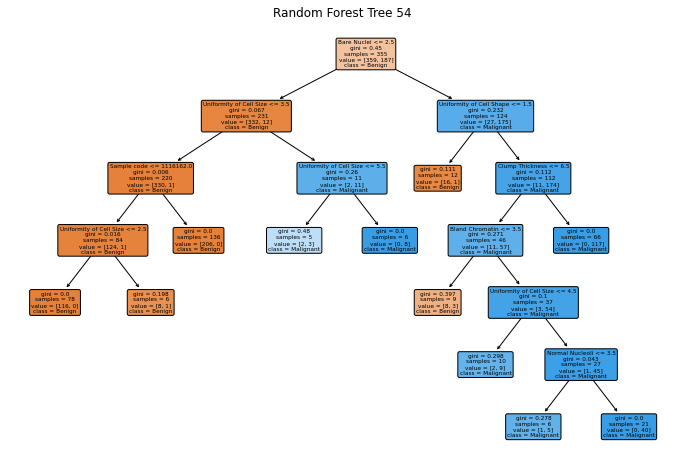

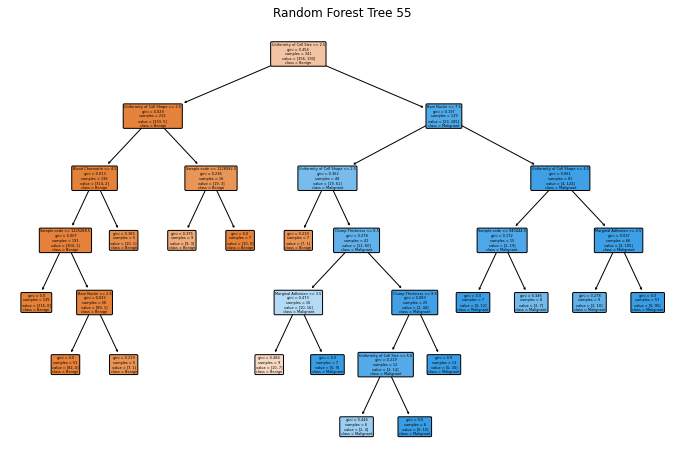

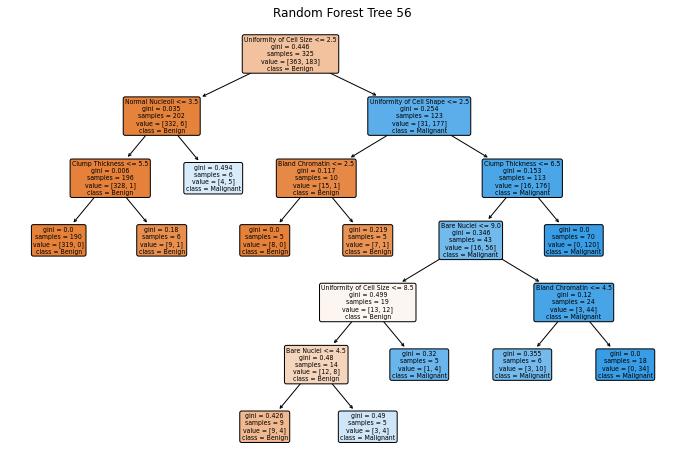

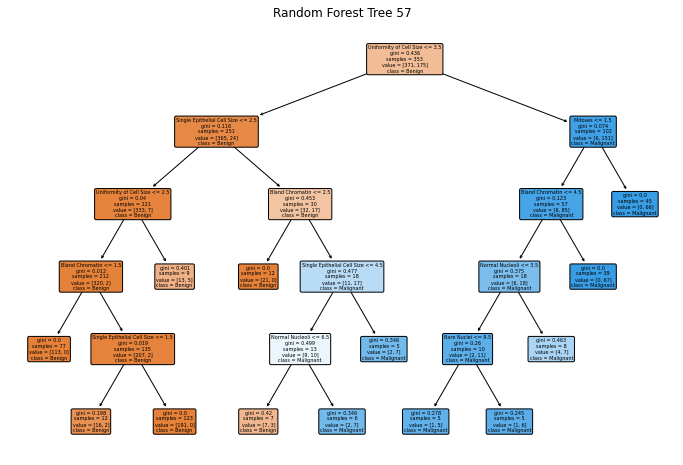

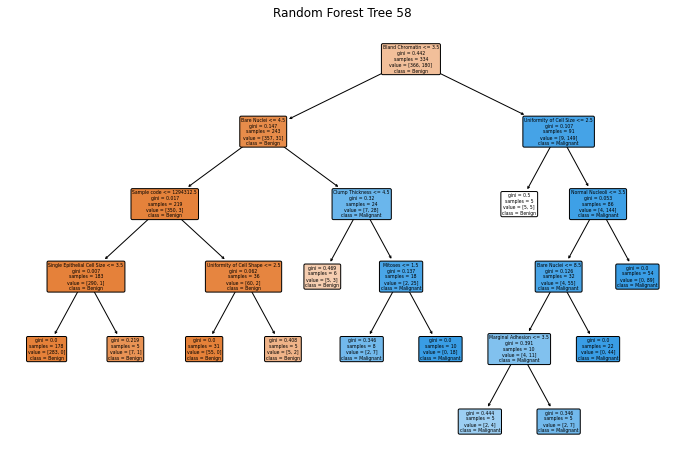

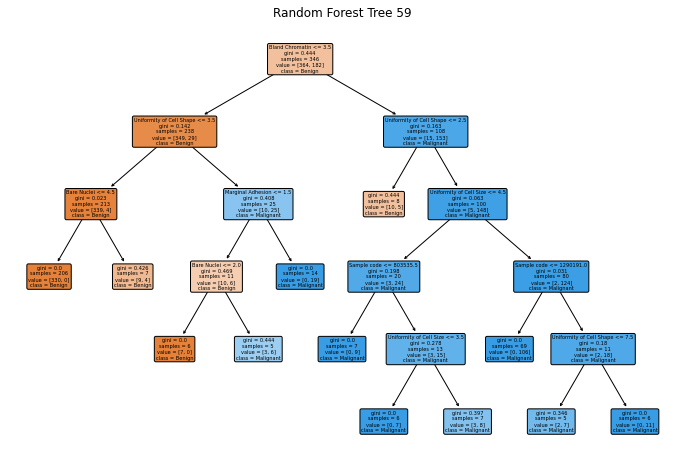

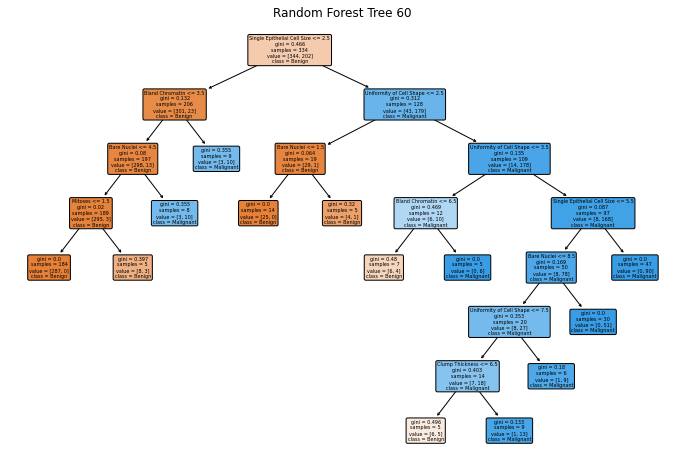

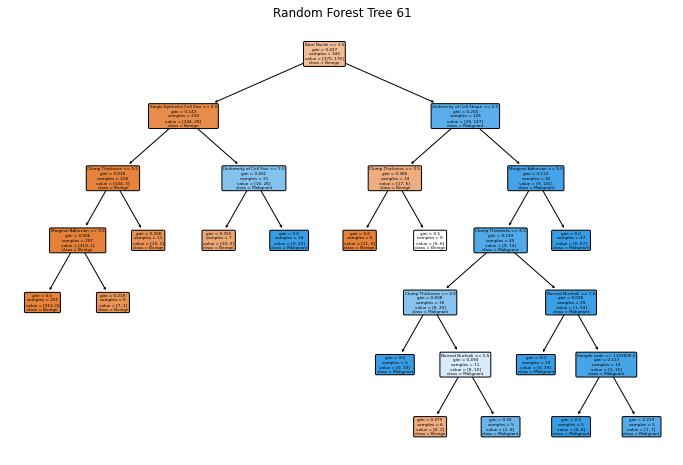

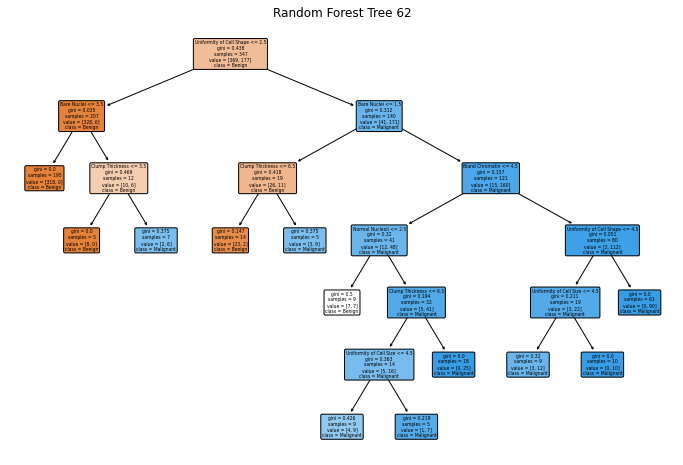

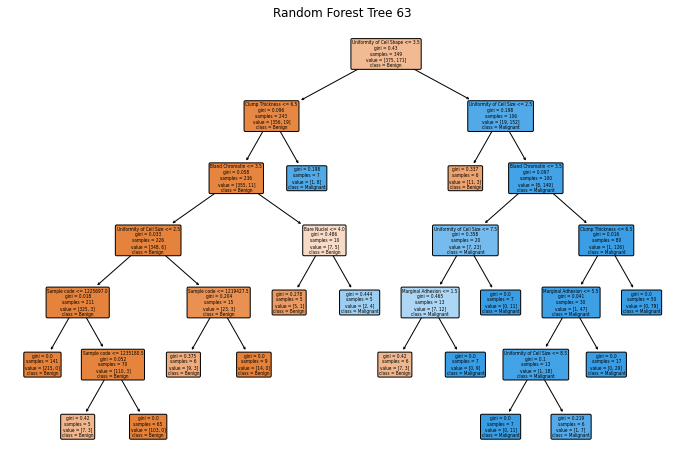

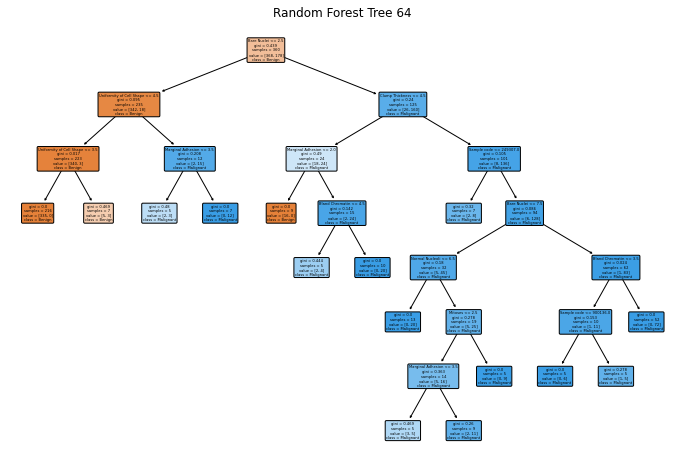

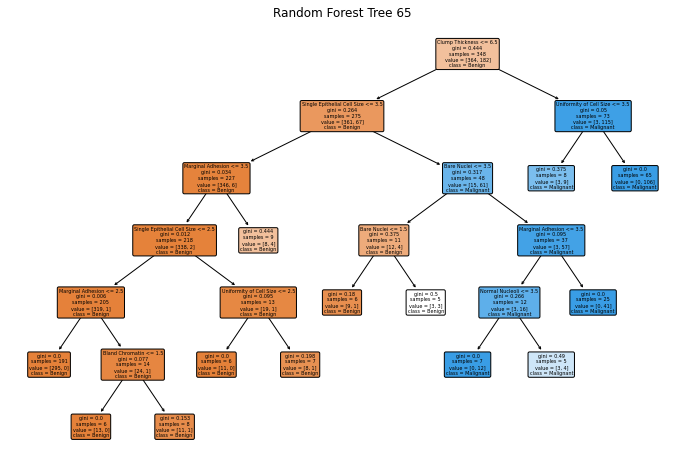

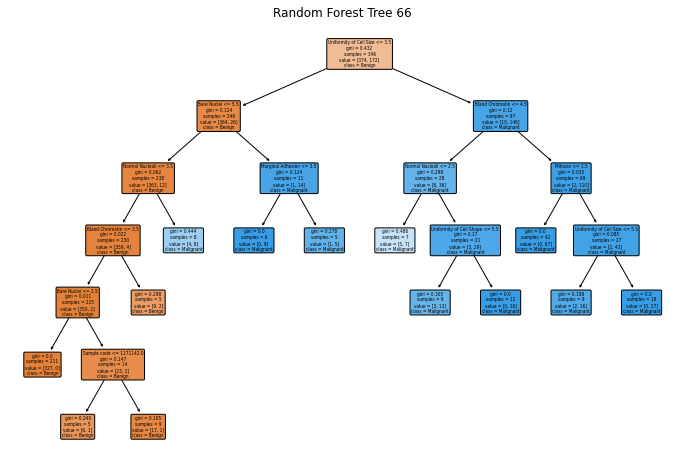

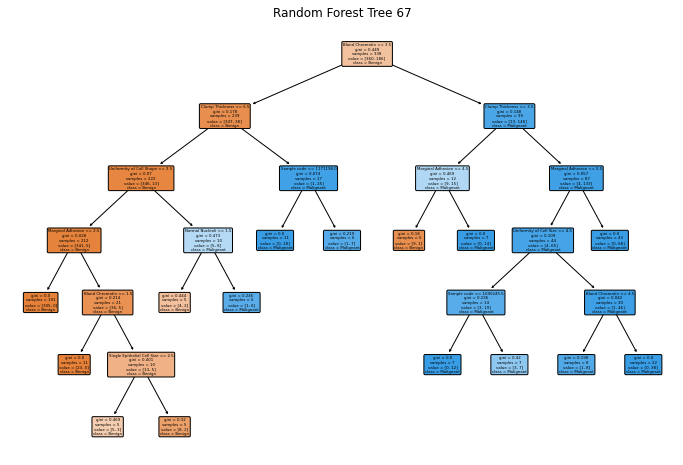

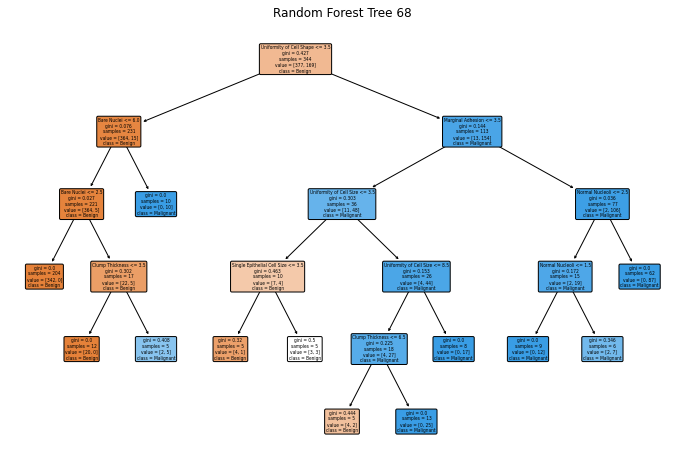

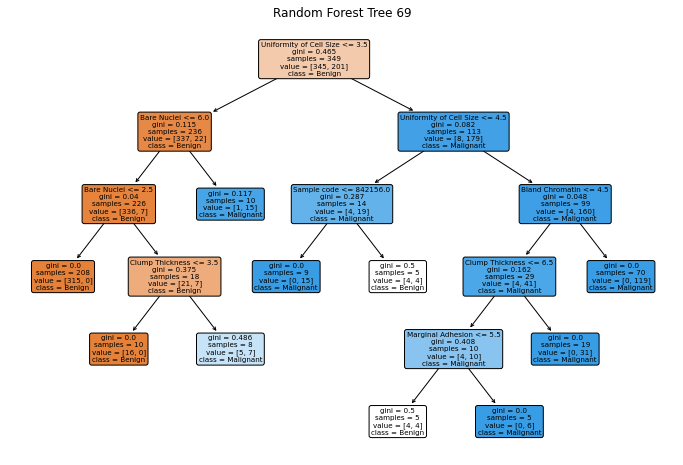

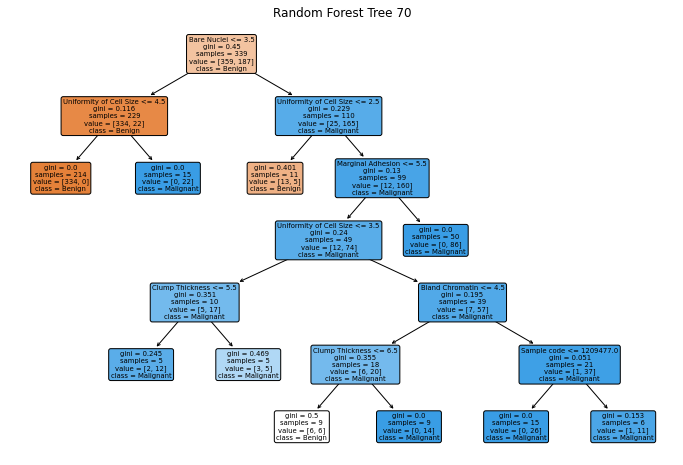

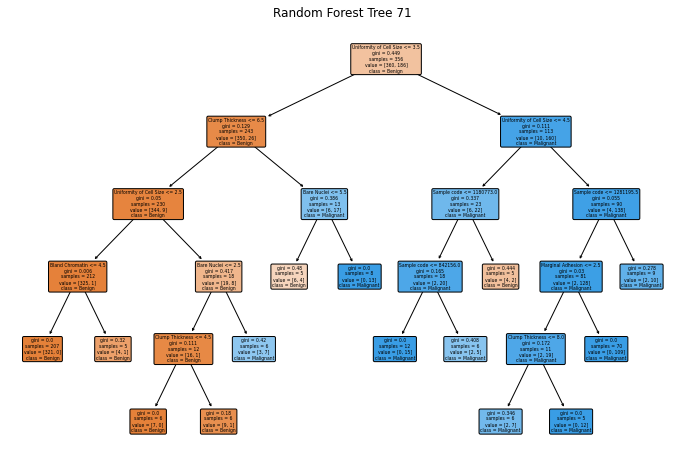

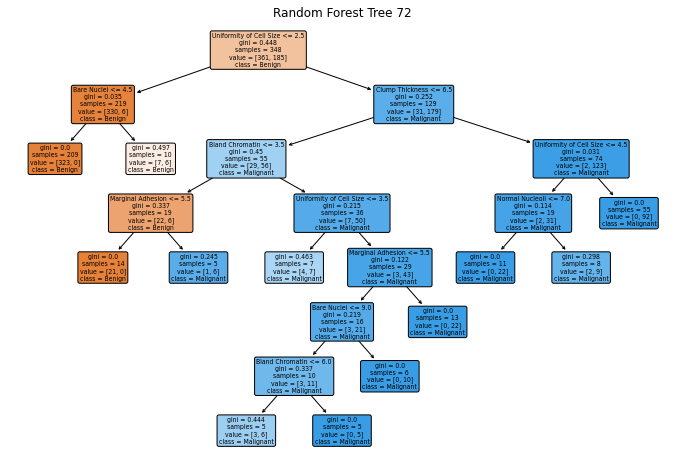

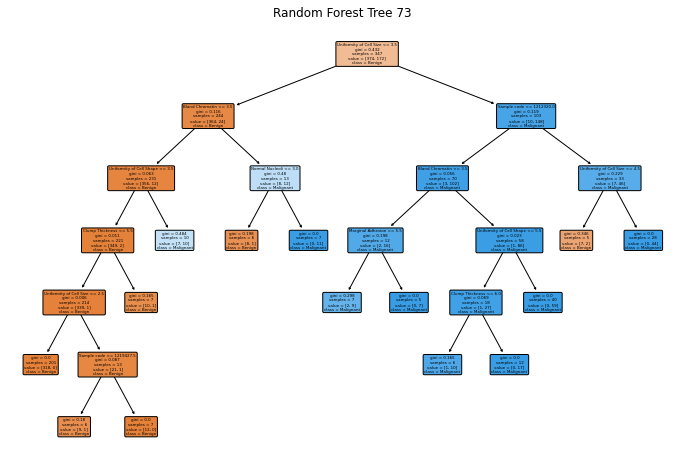

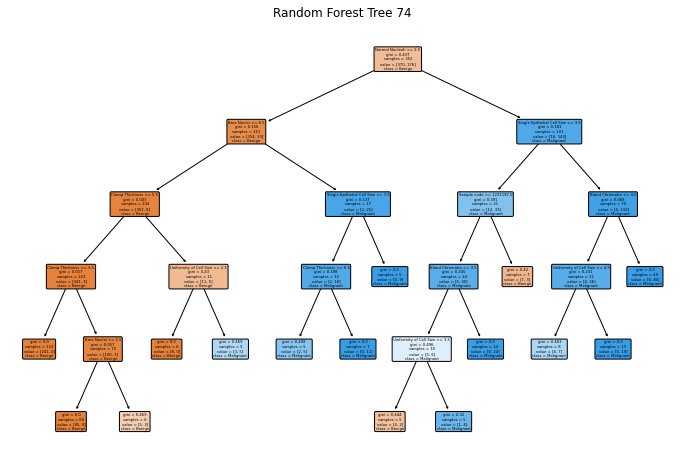

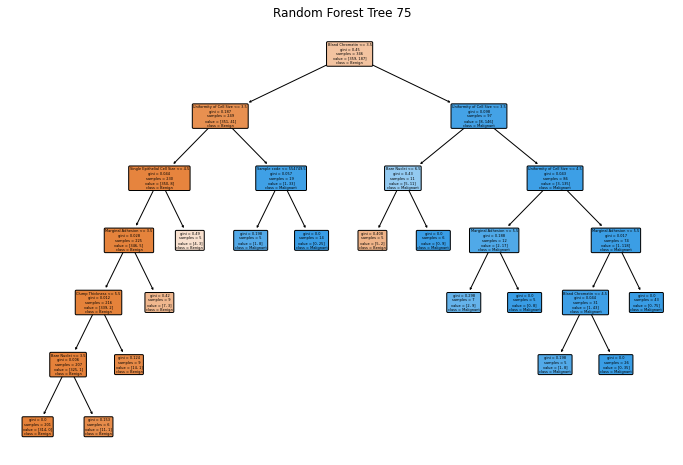

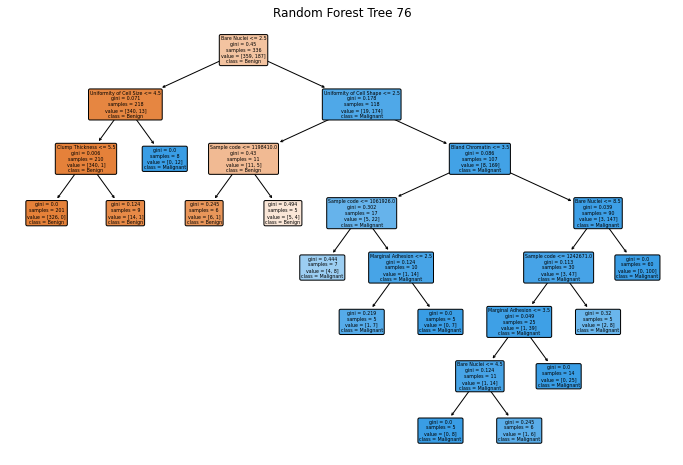

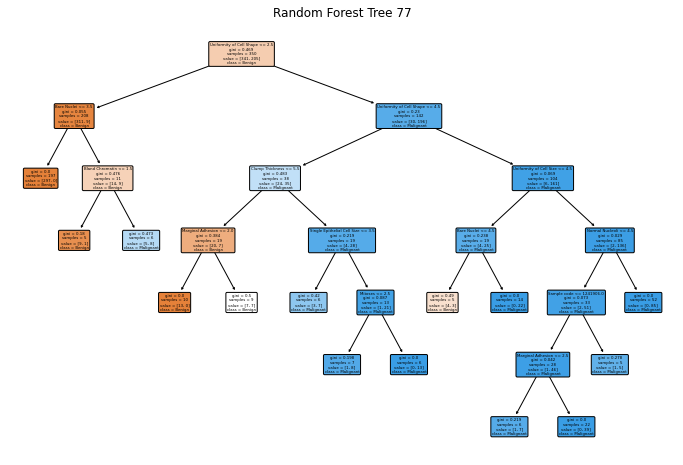

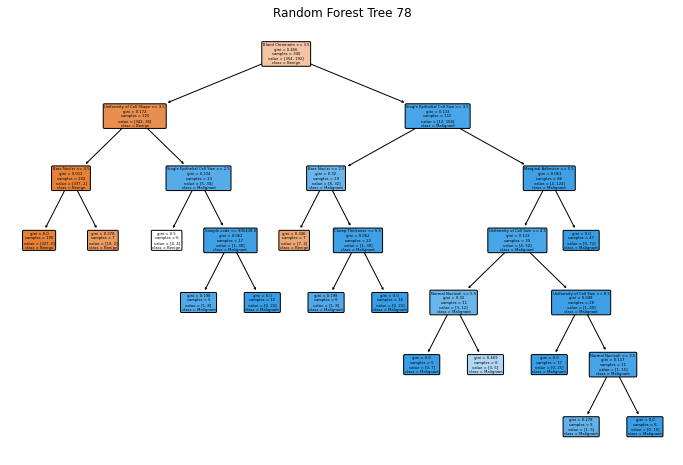

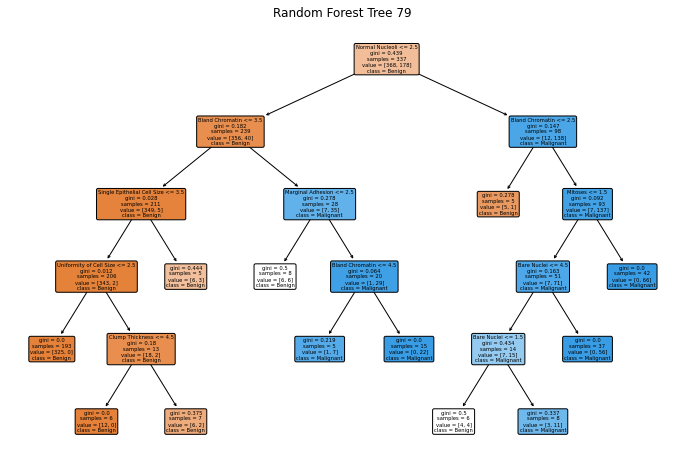

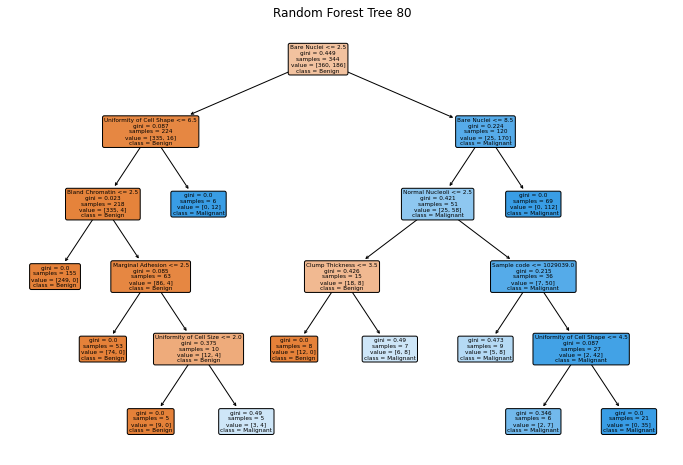

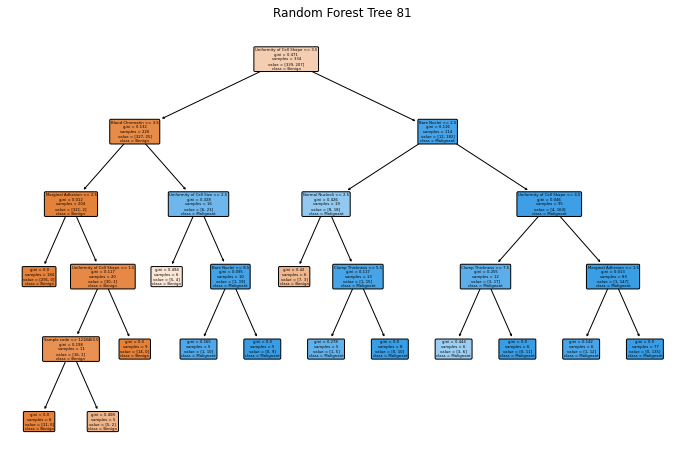

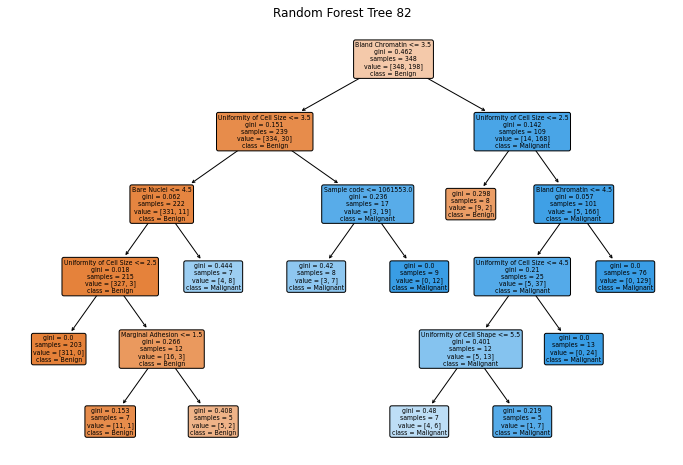

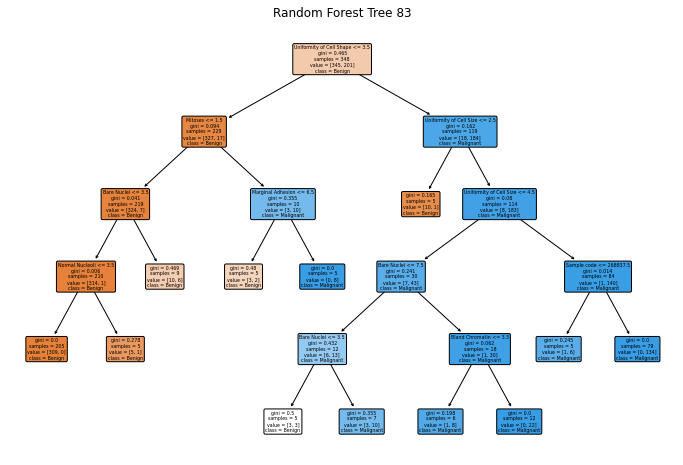

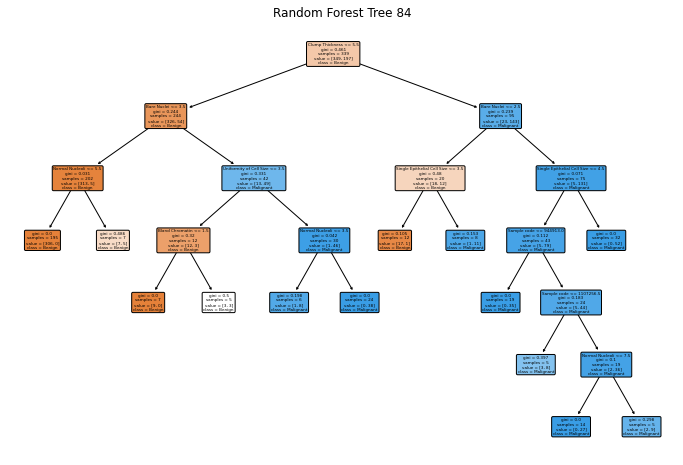

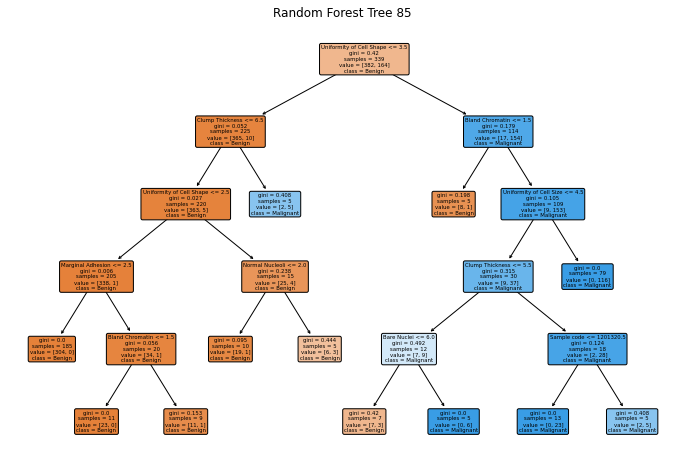

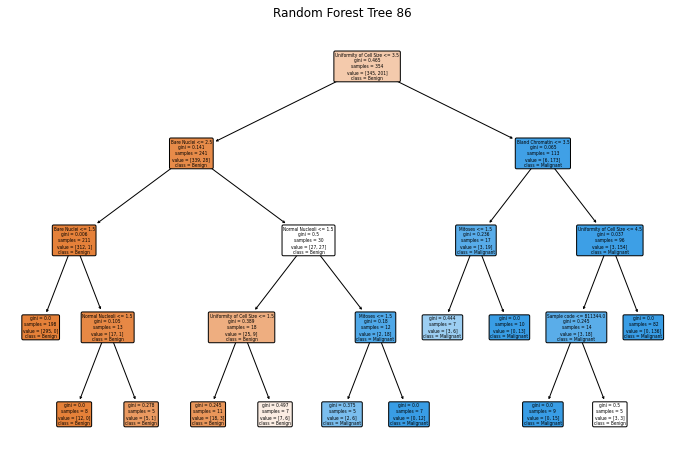

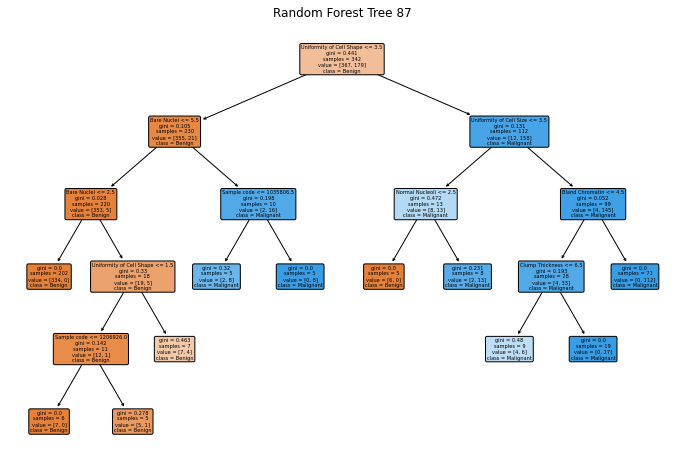

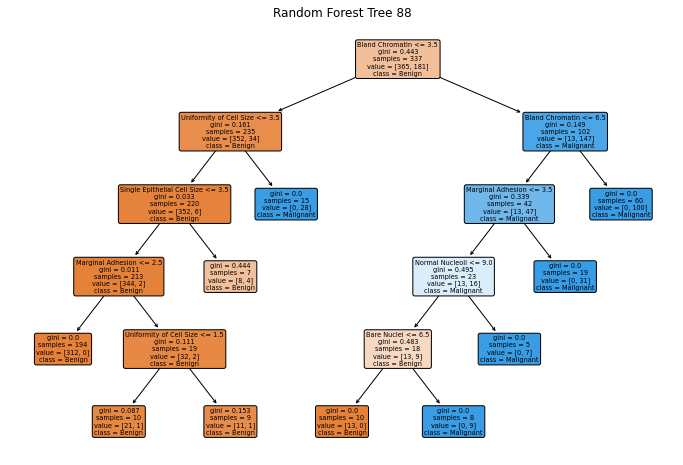

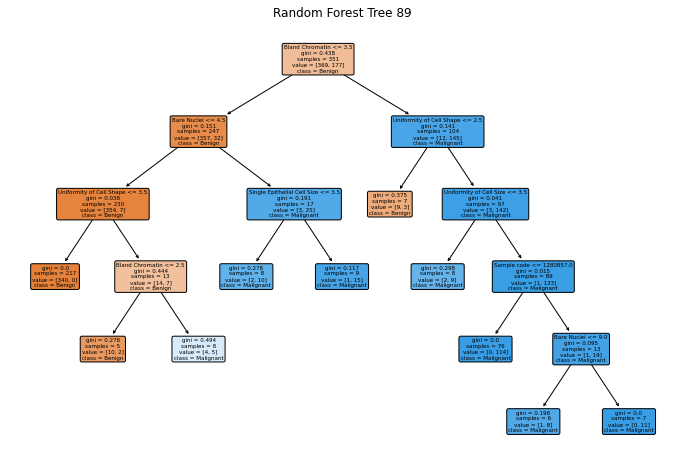

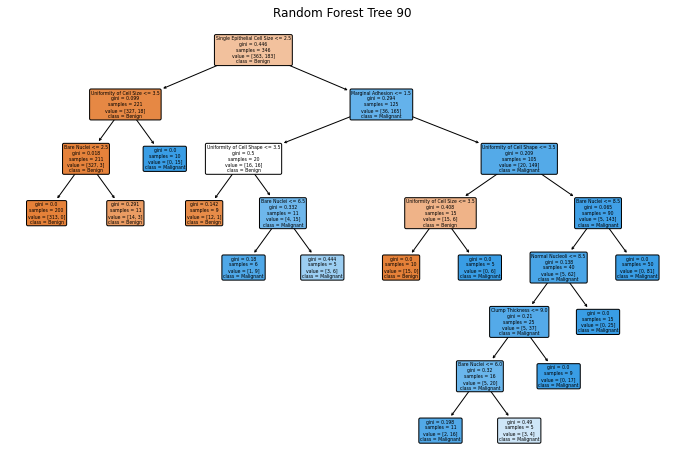

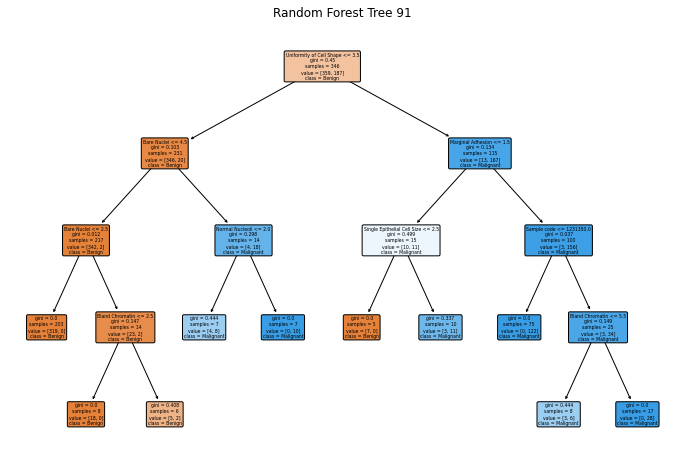

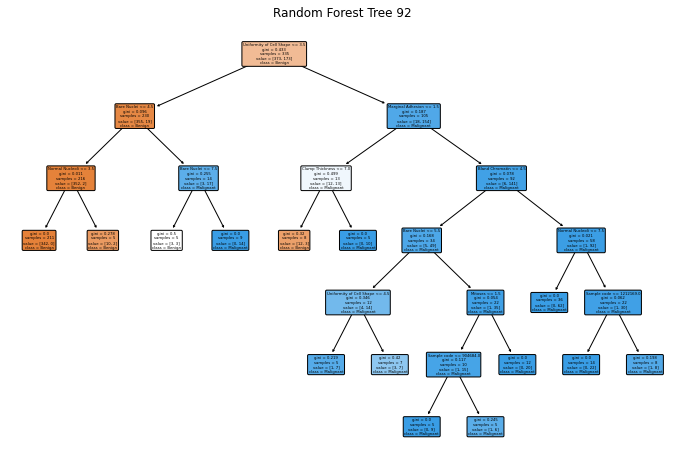

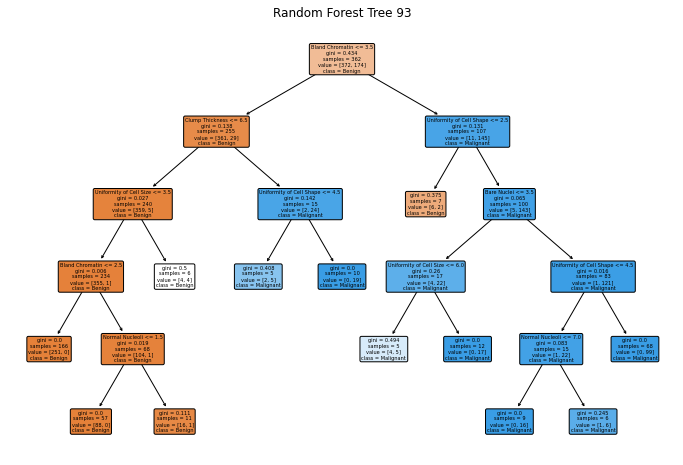

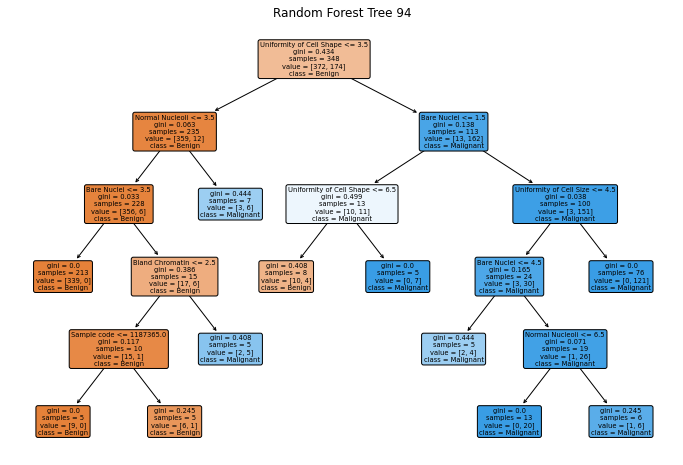

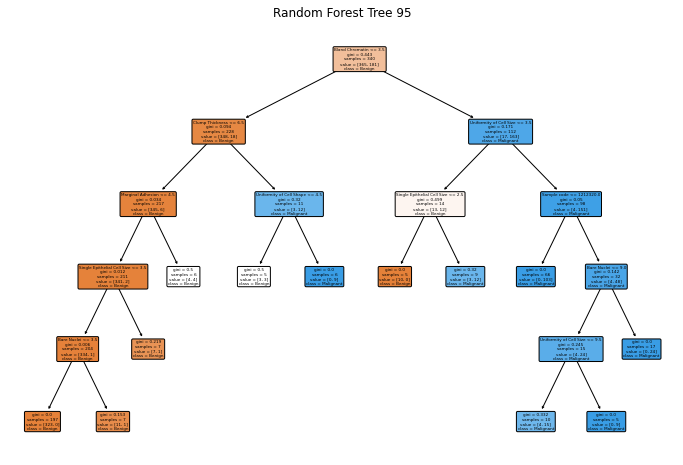

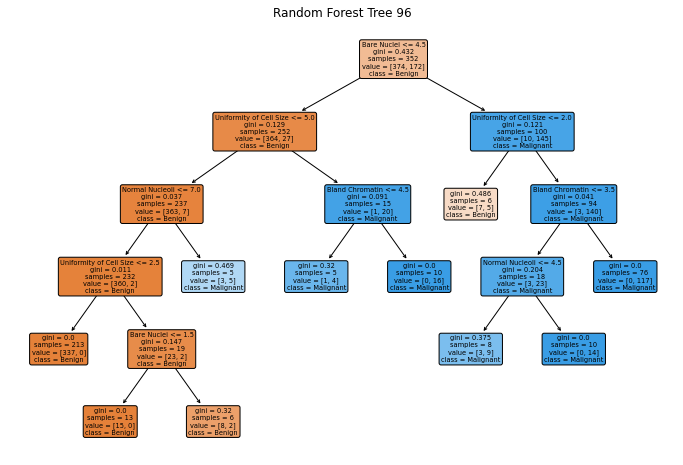

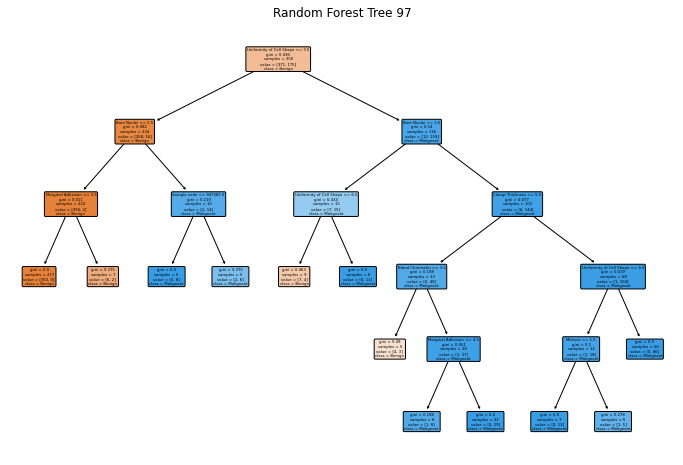

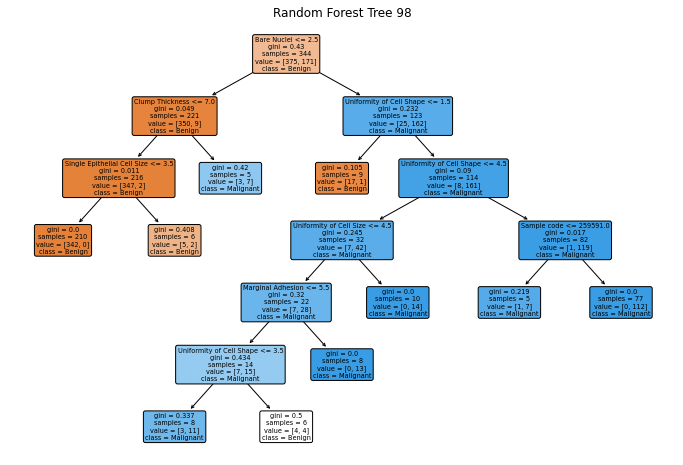

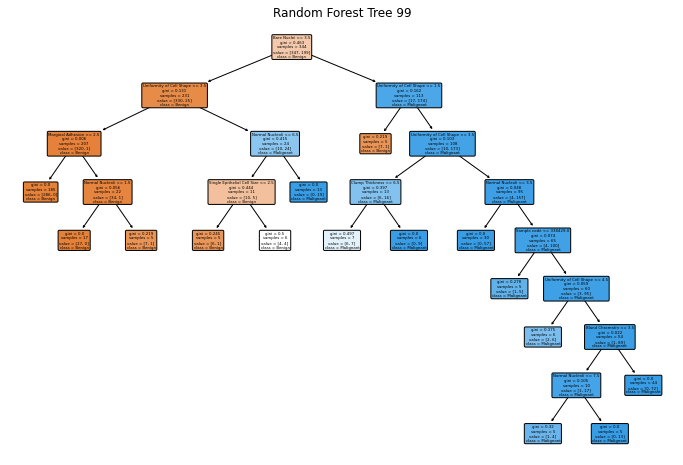

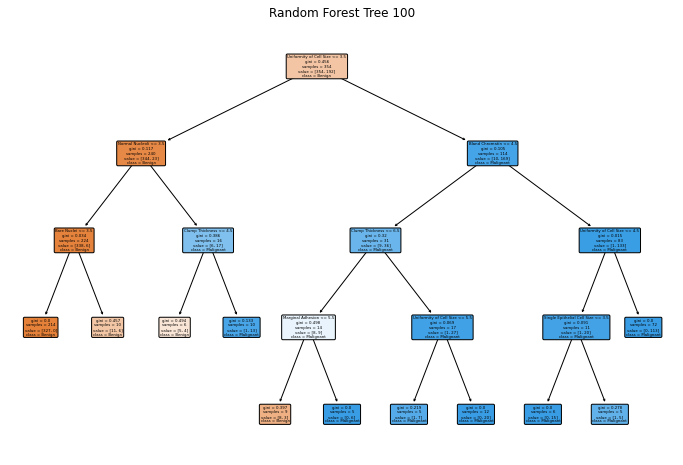

In [ ]:
# Step 5: Visualize each tree in the Random Forest
for i in range(n_estimators):
    tree = rf_classifier.estimators_[i]
    plt.figure(figsize=(12, 8))
    plot_tree(tree, feature_names=X.columns, class_names=['Benign', 'Malignant'], filled=True, rounded=True)
    plt.title(f"Random Forest Tree {i+1}")
    plt.show()

In [ ]:
count =0
for i in range(n_estimators):
    count=count+1
print (count)

100
